In [1]:
sys.path.insert(1,r'F:\Users\Kaggle\bulian')

In [2]:
import os,sys,torch
import pandas as pd

c:\Users\anaconda\envs\BulianAI\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from bulian.Tabular.synthesizers import TwinSynthesizer,PrivateTwinSynthesizer
from bulian.metrics import *
from bulian.metrics.reports import *
from bulian.metrics import compute_metrics
from bulian.metrics.single_table import SingleTableMetric
from bulian.metrics.single_table import *

c:\Users\anaconda\envs\BulianAI\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [6]:
import torch
torch.__version__

'1.12.0+cpu'

In [7]:
torch.cuda.is_available()

False

In [8]:
!nvidia-smi

Wed Jul 13 12:53:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   52C    P8    26W / 370W |    816MiB / 24576MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###### 

## Normal API: Non-privately differentiable synthesizer

In [9]:
data = pd.read_csv(r"F:\Users\Kaggle\bulian\examples\csv\adult.csv")

In [10]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [11]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [12]:
synth.fit(data=data,epochs=2,discrete_columns=discrete_columns)

Epoch: [0]  [  0/161]  eta: 0:00:08  loss_g: 2.1422 (2.1422)  loss_d: -0.0147 (-0.0147)  loss: 2.1275 (2.1275)  time: 0.0550  data: 0.0000
Epoch: [0]  [ 50/161]  eta: 0:00:05  loss_g: 1.5696 (1.8383)  loss_d: -0.6670 (-0.6301)  loss: 0.8486 (1.2082)  time: 0.0490  data: 0.0000
Epoch: [0]  [100/161]  eta: 0:00:02  loss_g: 1.5862 (1.7610)  loss_d: -0.0902 (-0.4460)  loss: 1.4857 (1.3151)  time: 0.0472  data: 0.0000
Epoch: [0]  [150/161]  eta: 0:00:00  loss_g: 1.1101 (1.6098)  loss_d: 0.1952 (-0.2516)  loss: 1.3103 (1.3581)  time: 0.0478  data: 0.0000
Epoch: [0]  [161/161]  eta: 0:00:00  loss_g: 1.1876 (1.5840)  loss_d: 0.0841 (-0.2305)  loss: 1.2350 (1.3534)  time: 0.0491  data: 0.0000
Epoch: [0] Total time: 0:00:07
Epoch: [1]  [  0/161]  eta: 0:00:09  loss_g: 1.4059 (1.4059)  loss_d: 0.2491 (0.2491)  loss: 1.6550 (1.6550)  time: 0.0609  data: 0.0000
Epoch: [1]  [ 50/161]  eta: 0:00:05  loss_g: 0.7155 (0.8821)  loss_d: 0.1376 (0.1308)  loss: 0.8749 (1.0130)  time: 0.0488  data: 0.0000
Ep

In [13]:
sample = synth.sample(1000)

In [15]:
sample

age      workclass  fnlwgt      education  education-num  \
0     19        Private  355458      Bachelors             11   
1     31      Local-gov  175899        7th-8th              9   
2     47              ?  207019        HS-grad             10   
3     44        Private  323224        HS-grad             10   
4     33        Private  217662   Some-college             10   
..   ...            ...     ...            ...            ...   
995   43   Self-emp-inc  150990   Some-college             11   
996   23        Private  355157   Some-college             10   
997   27        Private  248642   Some-college             10   
998   50        Private   69825        HS-grad              9   
999   46        Private  226030      Bachelors              9   

          marital-status          occupation    relationship    race      sex  \
0          Never-married       Other-service            Wife   White     Male   
1     Married-civ-spouse      Prof-specialty         Husband   White     Male   
2          Never-married   Machine-op-inspct       Unmarried   White   Female   
3               Divorced     Exec-managerial         Husband   White     Male   
4     Married-civ-spouse        Craft-repair       Own-child   White   Female   
..                   ...                 ...             ...     ...      ...   
995        Never-married       Other-service   Not-in-family   White     Male   
996        Never-married     Protective-serv       Unmarried   White   Female   
997   Married-civ-spouse               Sales         Husband   White     Male   
998             Divorced        Adm-clerical       Own-child   Black     Male   
999   Married-civ-spouse        Craft-repair       Own-child   White   Female   

     capital-gain  capital-loss  hours-per-week  native-country  income  
0             102             5              40   United-States   <=50K  
1            6361             3              40               ?   <=50K  
2             -14             3               8   United-States   <=50K  
3            5468             5              44   United-States   <=50K  
4             123             7               2   United-States   <=50K  
..            ...           ...             ...             ...     ...  
995          8506             6              40   United-States   <=50K  
996            81             3              40   United-States   <=50K  
997           132             7              40     Philippines    >50K  
998            38             6              40   United-States   <=50K  
999           135             6              24          Mexico    >50K  

[1000 rows x 15 columns]

In [16]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [17]:
metrics

{'BNLogLikelihood': bulian.metrics.single_table.bayesian_network.BNLogLikelihood,
 'LogisticDetection': bulian.metrics.single_table.detection.sklearn.LogisticDetection,
 'SVCDetection': bulian.metrics.single_table.detection.sklearn.SVCDetection,
 'BinaryDecisionTreeClassifier': bulian.metrics.single_table.efficacy.binary.BinaryDecisionTreeClassifier,
 'BinaryAdaBoostClassifier': bulian.metrics.single_table.efficacy.binary.BinaryAdaBoostClassifier,
 'BinaryLogisticRegression': bulian.metrics.single_table.efficacy.binary.BinaryLogisticRegression,
 'BinaryMLPClassifier': bulian.metrics.single_table.efficacy.binary.BinaryMLPClassifier,
 'MulticlassDecisionTreeClassifier': bulian.metrics.single_table.efficacy.multiclass.MulticlassDecisionTreeClassifier,
 'MulticlassMLPClassifier': bulian.metrics.single_table.efficacy.multiclass.MulticlassMLPClassifier,
 'LinearRegression': bulian.metrics.single_table.efficacy.regression.LinearRegression,
 'MLPRegressor': bulian.metrics.single_table.efficacy

In [18]:
compute_metrics(metrics,data, sample)

metric                                     name  \
0                    BNLogLikelihood           BayesianNetwork Log Likelihood   
1                  LogisticDetection             LogisticRegression Detection   
2                       SVCDetection                            SVC Detection   
3       BinaryDecisionTreeClassifier                                     None   
4           BinaryAdaBoostClassifier                                     None   
5           BinaryLogisticRegression                                     None   
6                BinaryMLPClassifier                                     None   
7   MulticlassDecisionTreeClassifier                                     None   
8            MulticlassMLPClassifier                                     None   
9                   LinearRegression                                     None   
10                      MLPRegressor                                     None   
11                   GMLogLikelihood           GaussianMixture Log Likelihood   
12                            CSTest                              Chi-Squared   
13                            KSTest  Inverted Kolmogorov-Smirnov D statistic   
14                    KSTestExtended  Inverted Kolmogorov-Smirnov D statistic   
15                    CategoricalCAP                           CategoricalCAP   
16                CategoricalZeroCAP                                     0CAP   
17         CategoricalGeneralizedCAP               Categorical GeneralizedCAP   
18                     CategoricalNB                Categorical NaiveBayesian   
19                    CategoricalKNN                      K-Nearest Neighbors   
20                     CategoricalRF                Categorical Random Forest   
21                    CategoricalSVM                Support Vector Classifier   
22               CategoricalEnsemble                                 Ensemble   
23                       NumericalLR              Numerical Linear Regression   
24                      NumericalMLP        Multi-layer Perceptron Regression   
25                      NumericalSVR      Numerical Support-vector Regression   
26    NumericalRadiusNearestNeighbor        Numerical Radius Nearest Neighbor   
27            ContinuousKLDivergence   Continuous Kullback–Leibler Divergence   
28              DiscreteKLDivergence     Discrete Kullback–Leibler Divergence   

       raw_score  normalized_score  min_value  max_value      goal  \
0            NaN               NaN       -inf        0.0  MAXIMIZE   
1            NaN               NaN        0.0        1.0  MAXIMIZE   
2            NaN               NaN        0.0        1.0  MAXIMIZE   
3            NaN               NaN        0.0        1.0  MAXIMIZE   
4            NaN               NaN        0.0        1.0  MAXIMIZE   
5            NaN               NaN        0.0        1.0  MAXIMIZE   
6            NaN               NaN        0.0        1.0  MAXIMIZE   
7            NaN               NaN        0.0        1.0  MAXIMIZE   
8            NaN               NaN        0.0        1.0  MAXIMIZE   
9            NaN               NaN       -inf        1.0  MAXIMIZE   
10           NaN               NaN       -inf        1.0  MAXIMIZE   
11 -2.083877e+09          0.000000       -inf        inf  MAXIMIZE   
12  9.850387e-01          0.985039        0.0        1.0  MAXIMIZE   
13  6.209423e-01          0.620942        0.0        1.0  MAXIMIZE   
14  8.036857e-01          0.803686        0.0        1.0  MAXIMIZE   
15           NaN               NaN        0.0        1.0  MAXIMIZE   
16           NaN               NaN        0.0        1.0  MAXIMIZE   
17           NaN               NaN        0.0        1.0  MAXIMIZE   
18           NaN               NaN        0.0        1.0  MAXIMIZE   
19           NaN               NaN        0.0        1.0  MAXIMIZE   
20           NaN               NaN        0.0        1.0  MAXIMIZE   
21           NaN               NaN        0.0        1.0  M

#### Report with privacy metrics

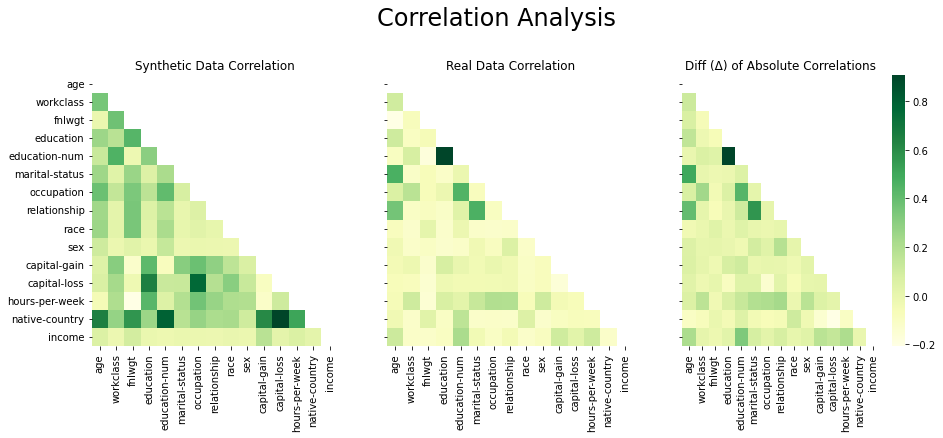

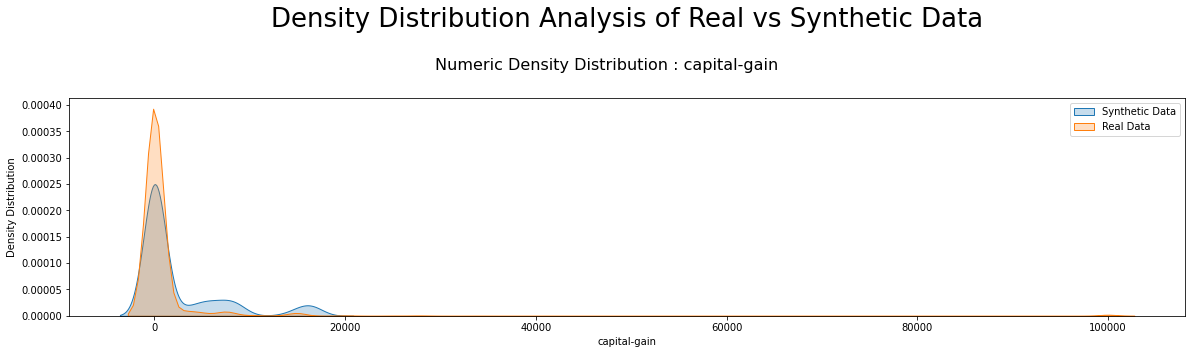

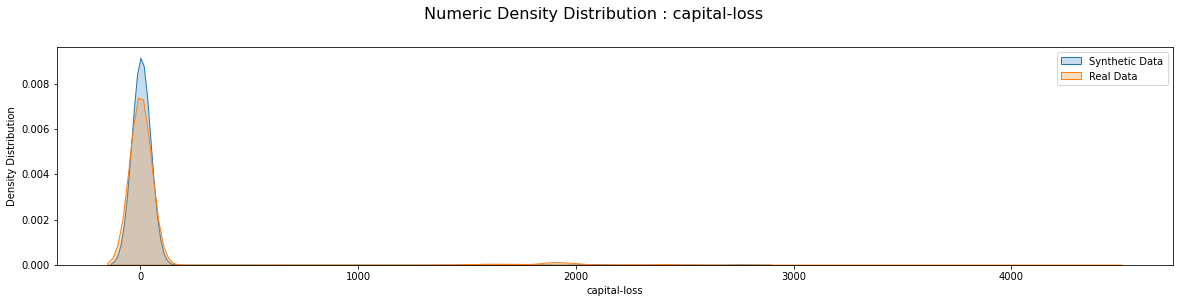

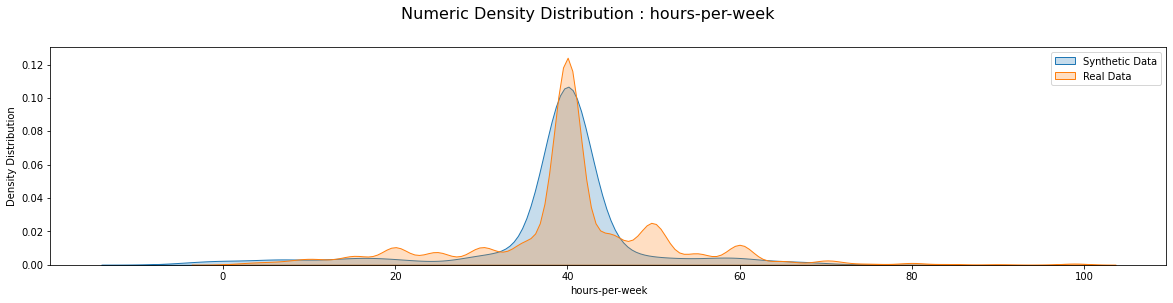

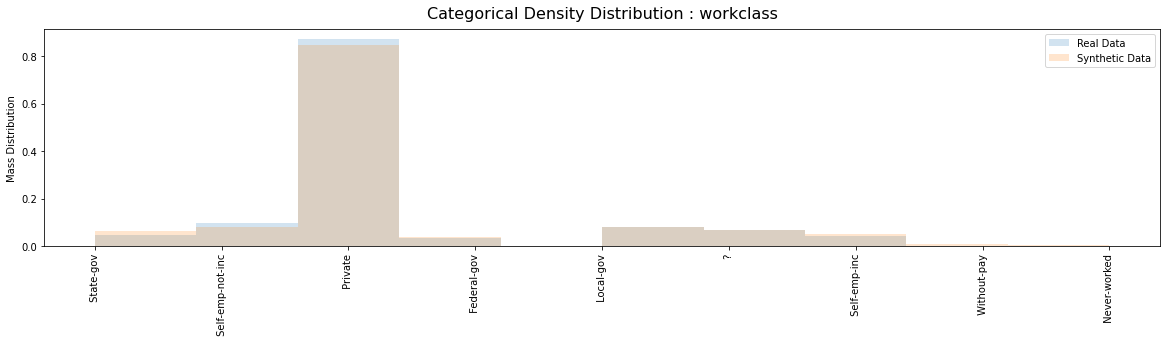

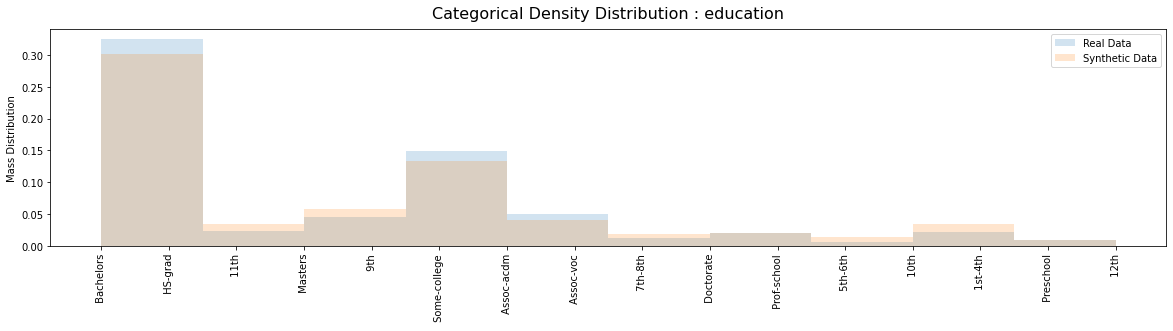

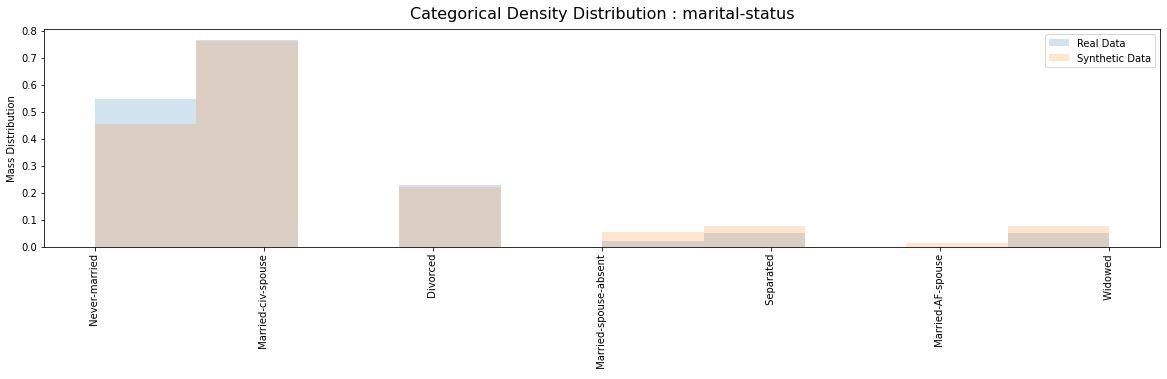

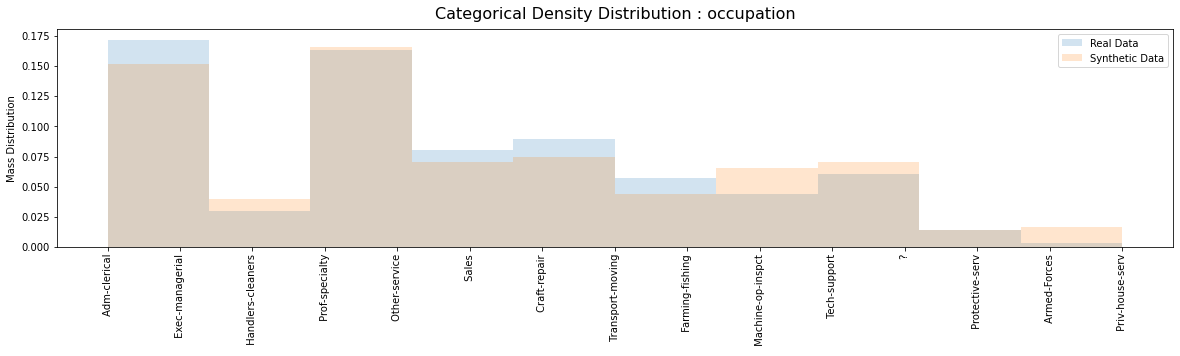

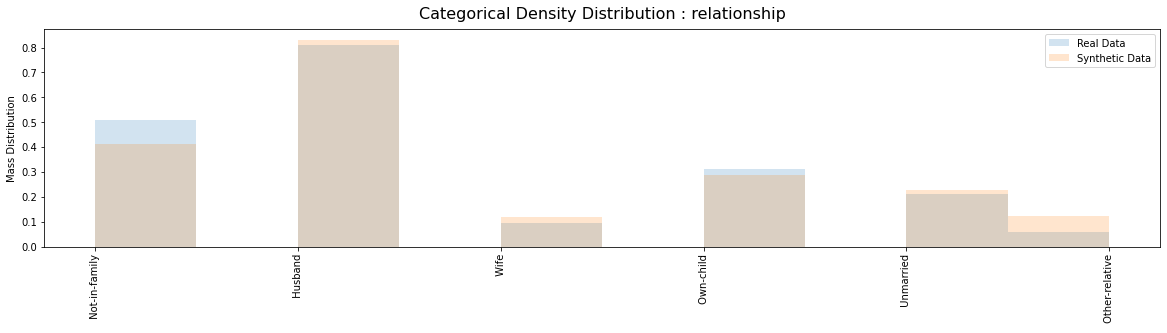

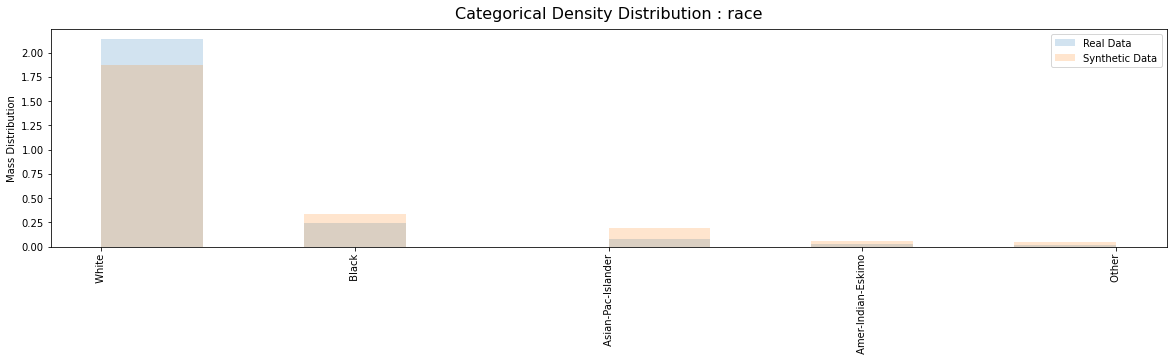

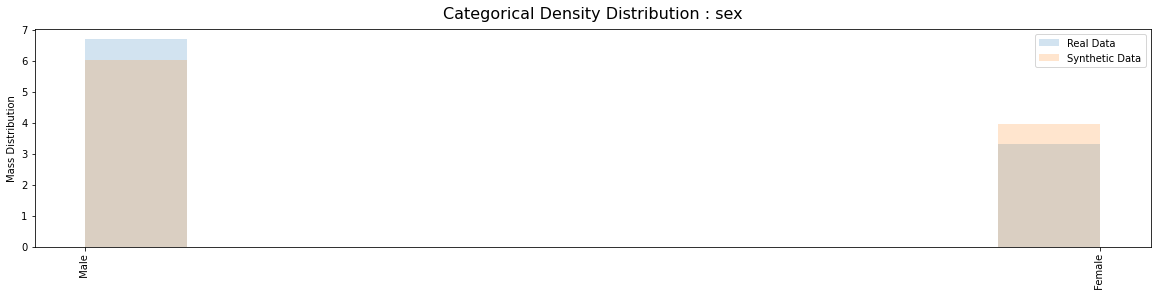

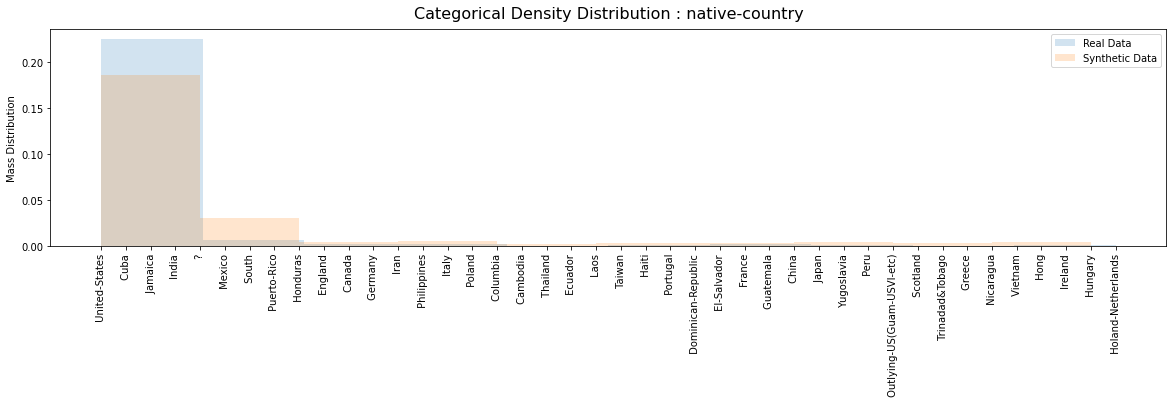

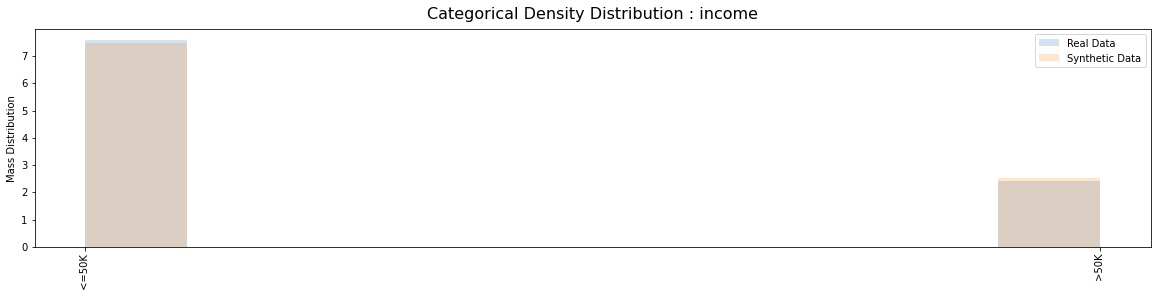

In [19]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

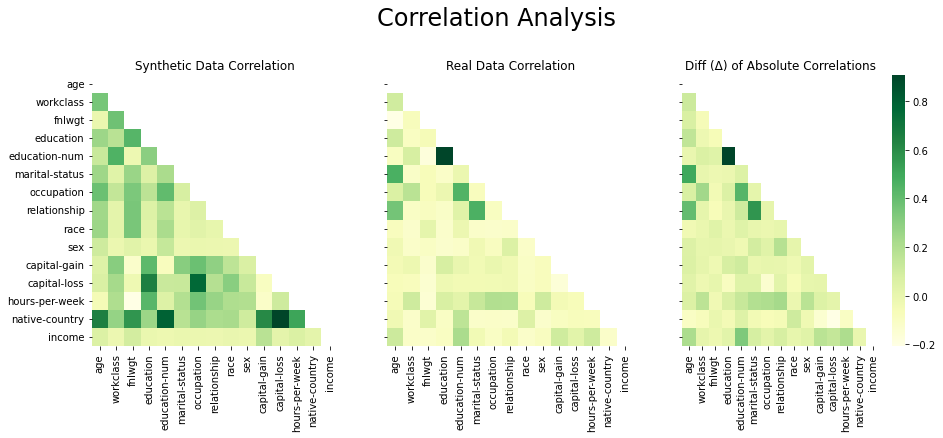

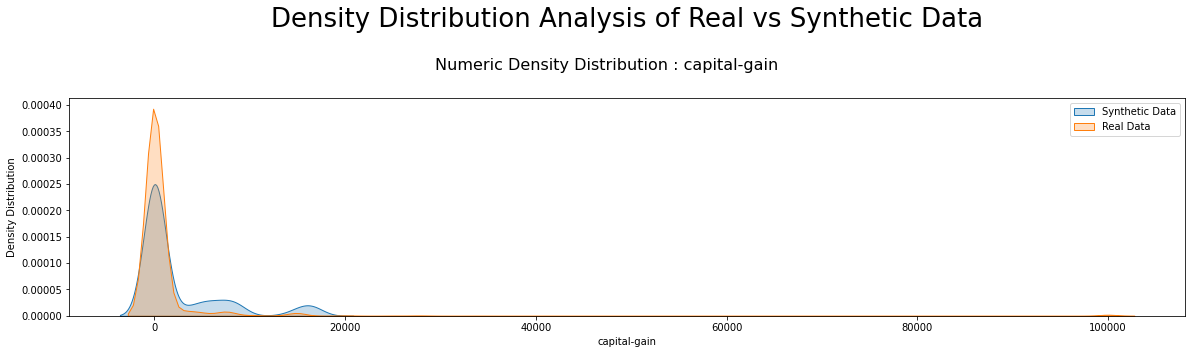

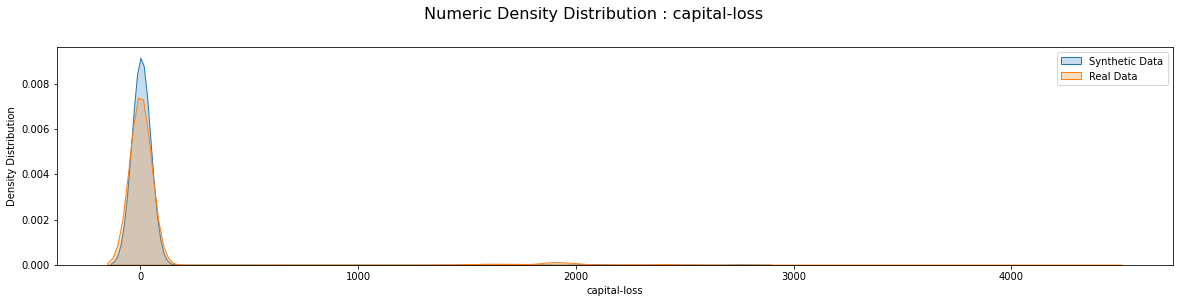

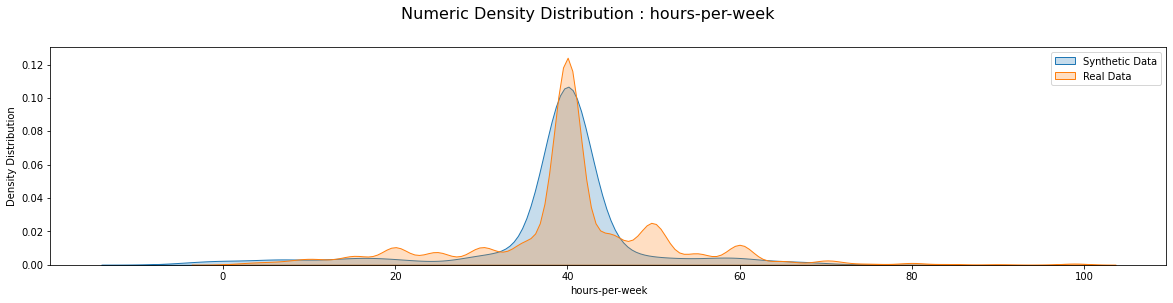

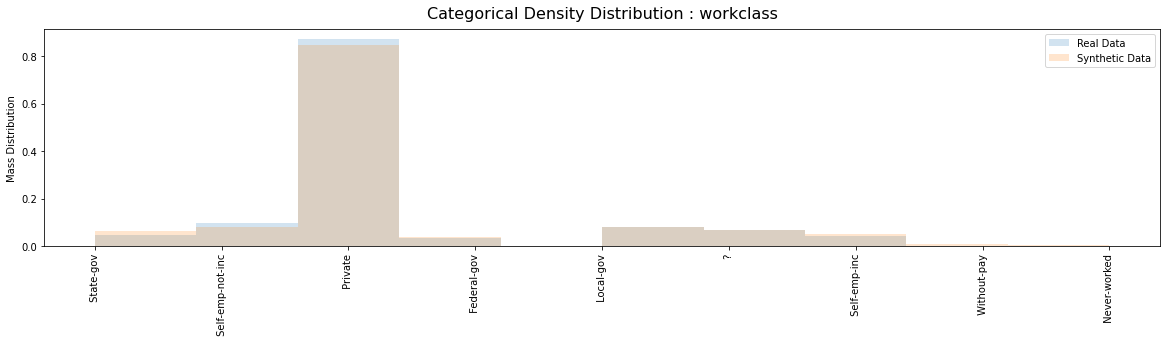

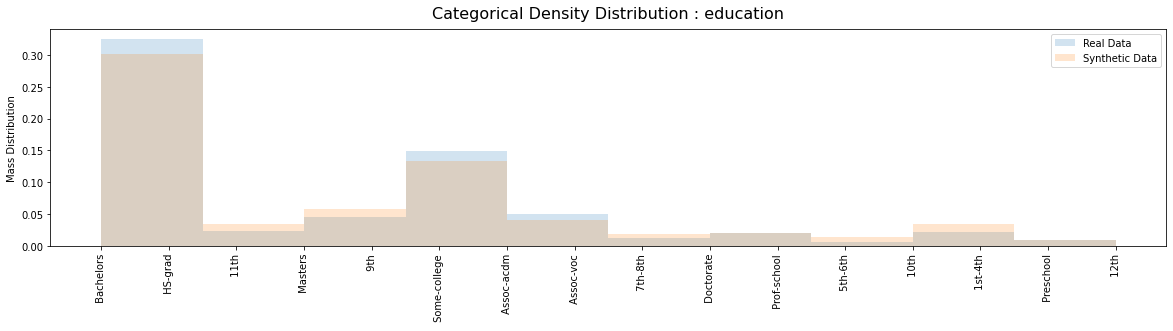

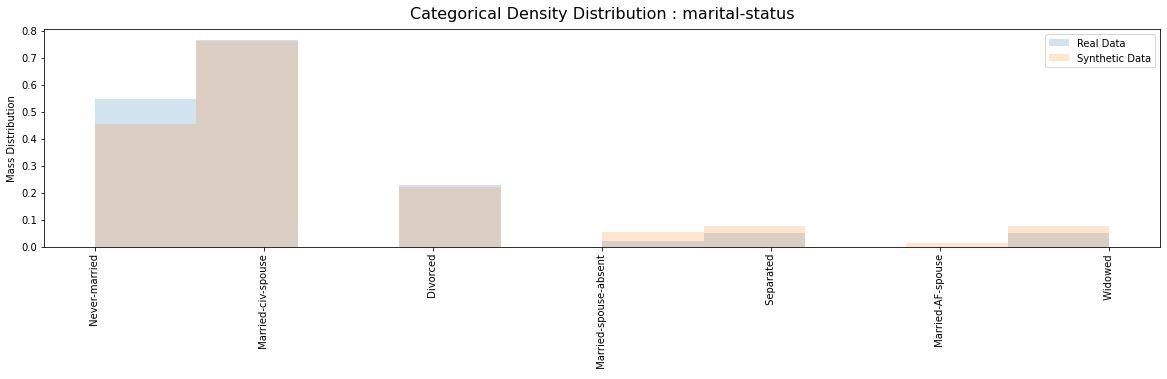

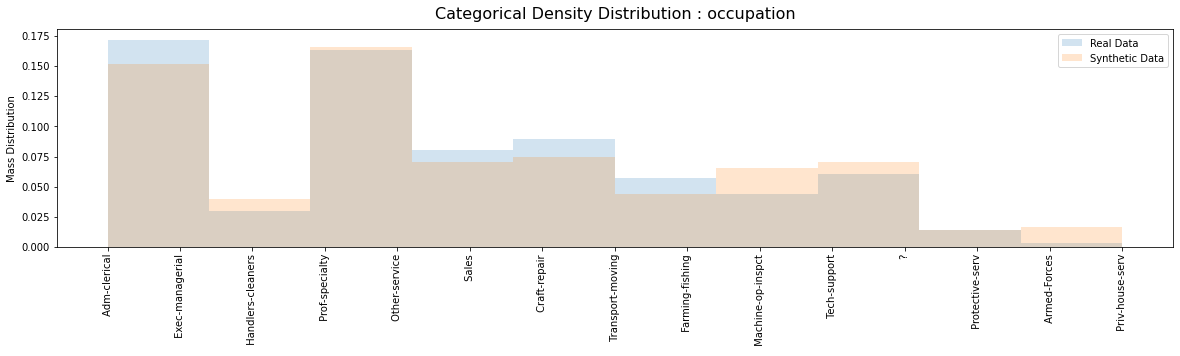

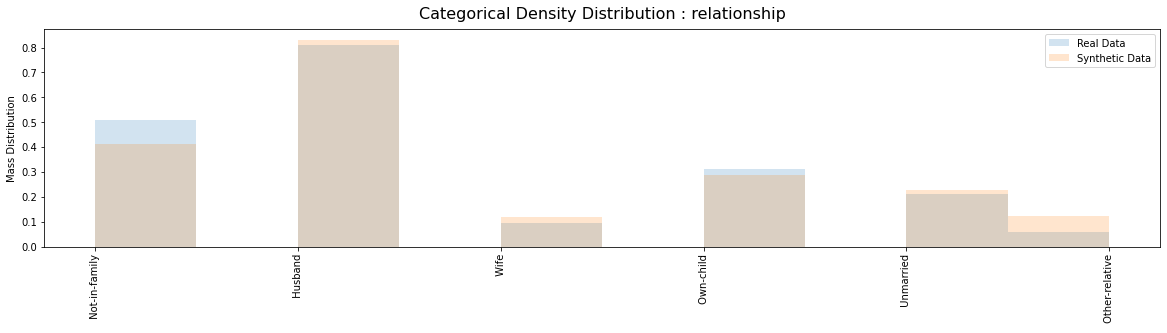

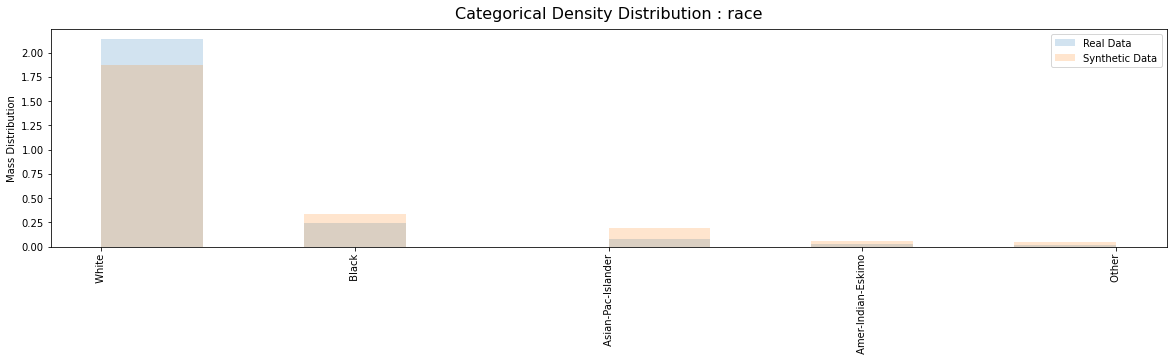

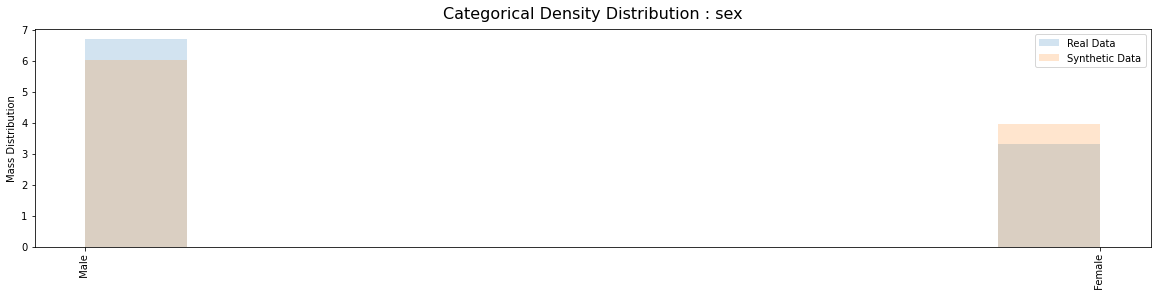

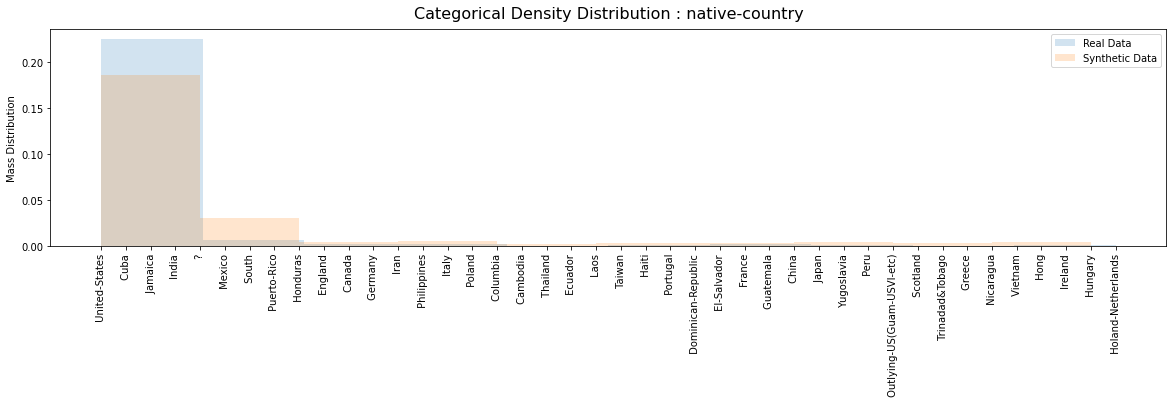

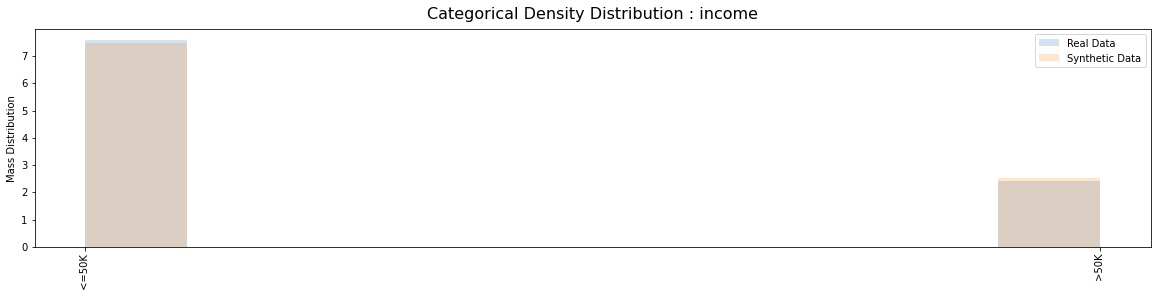

In [20]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

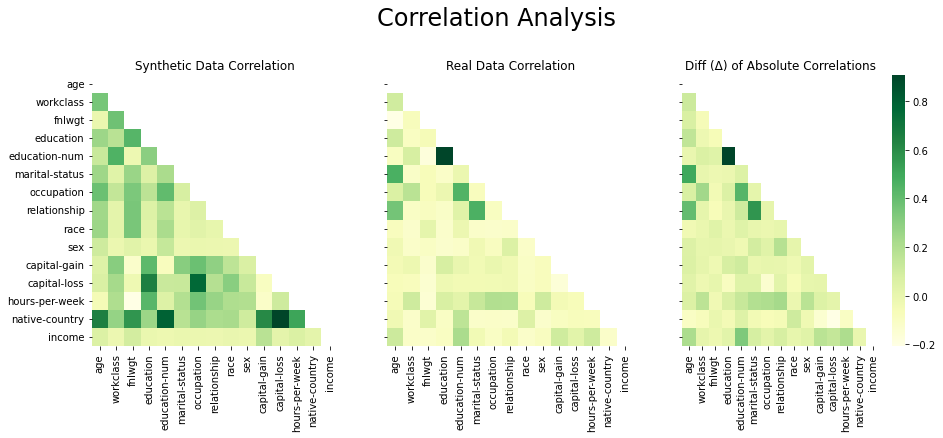

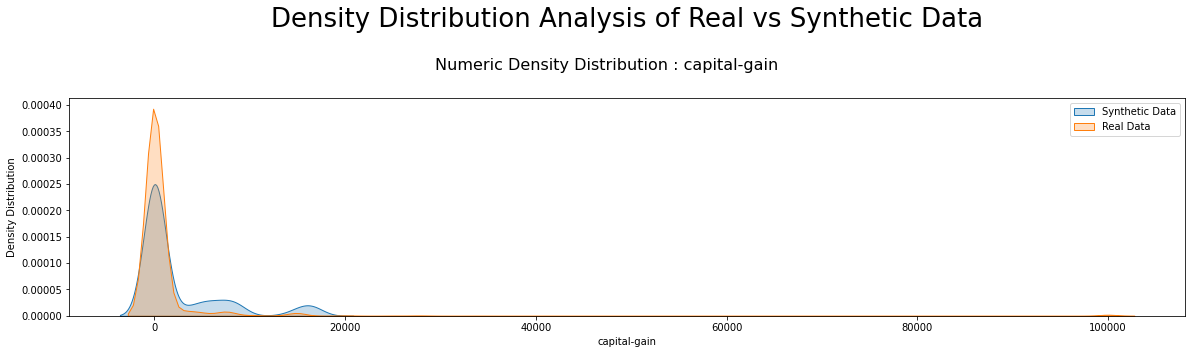

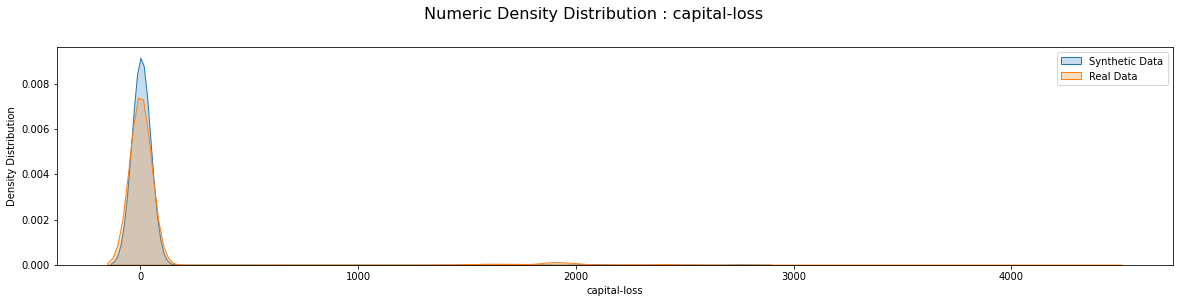

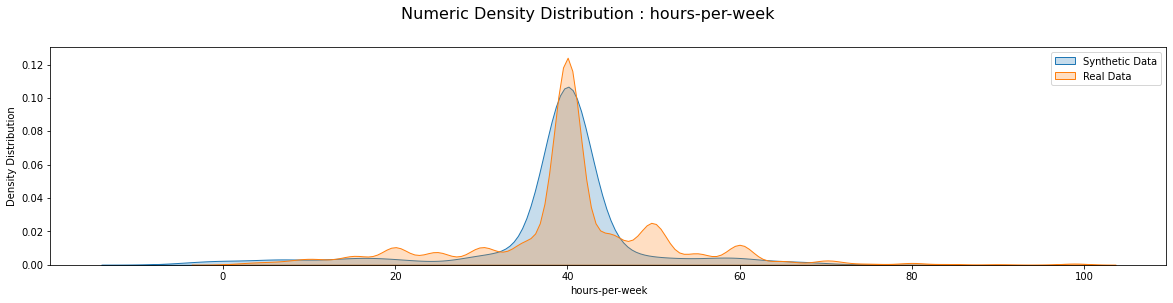

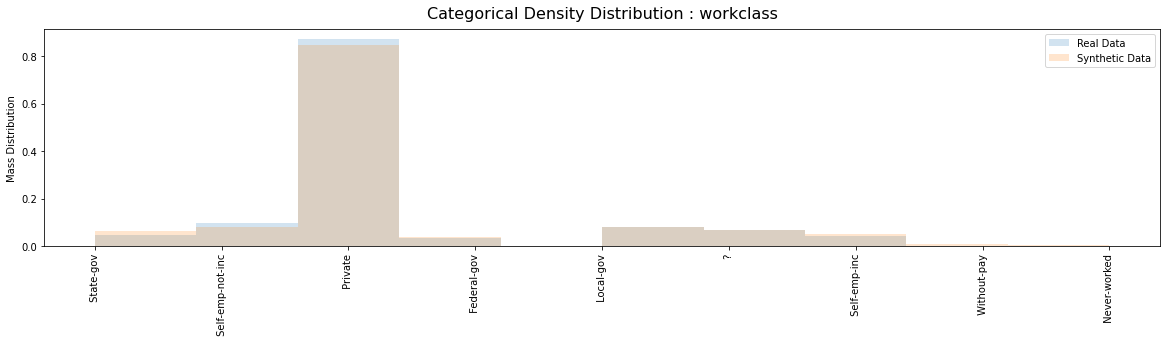

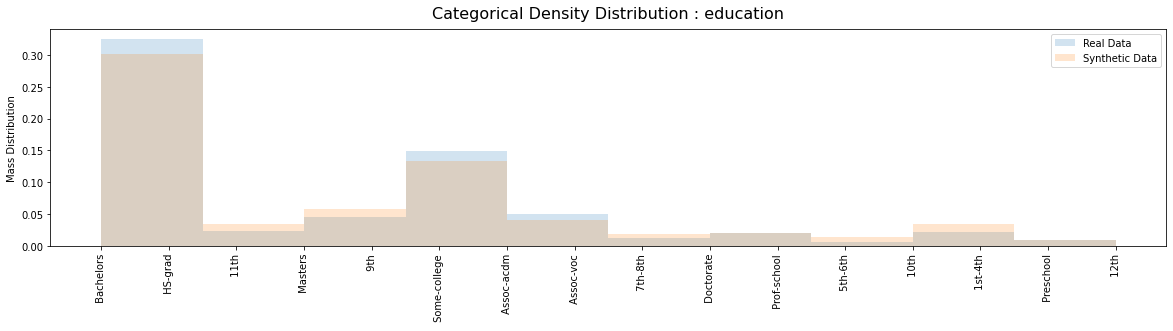

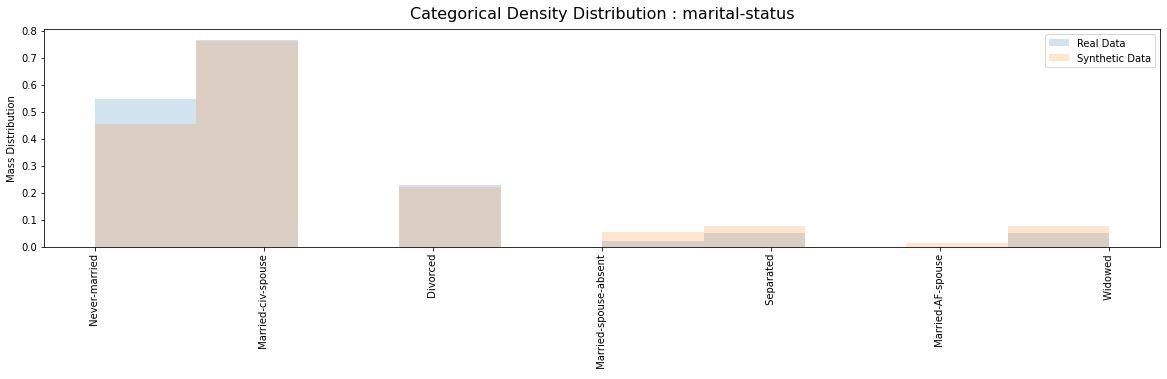

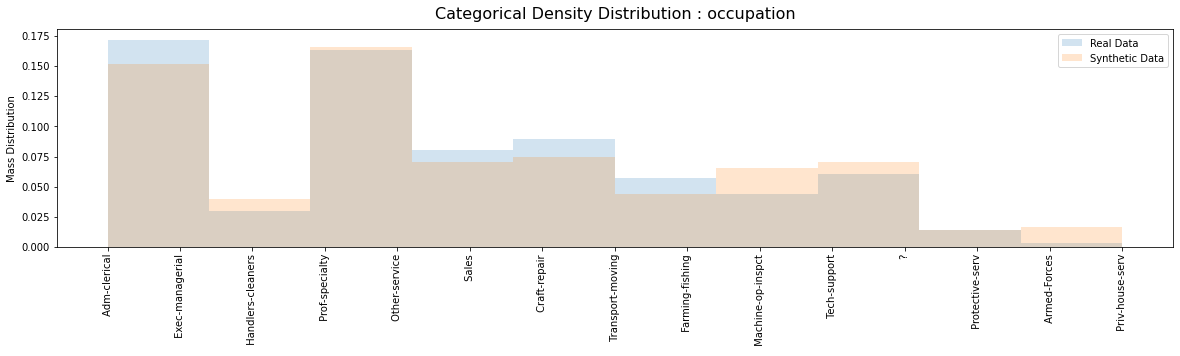

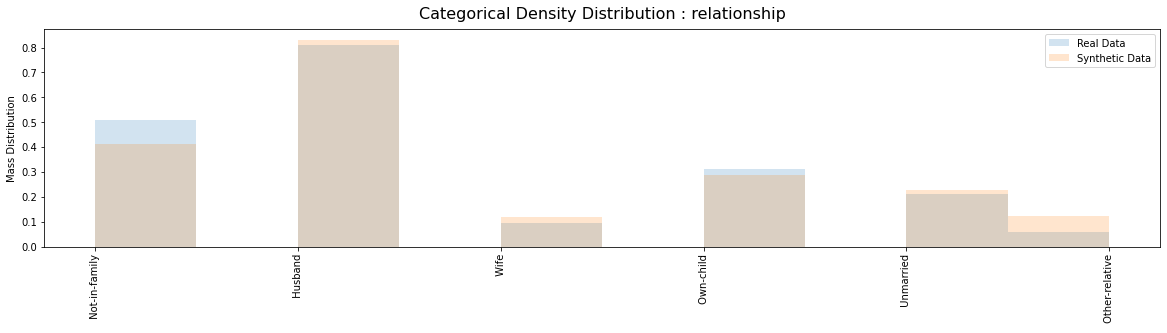

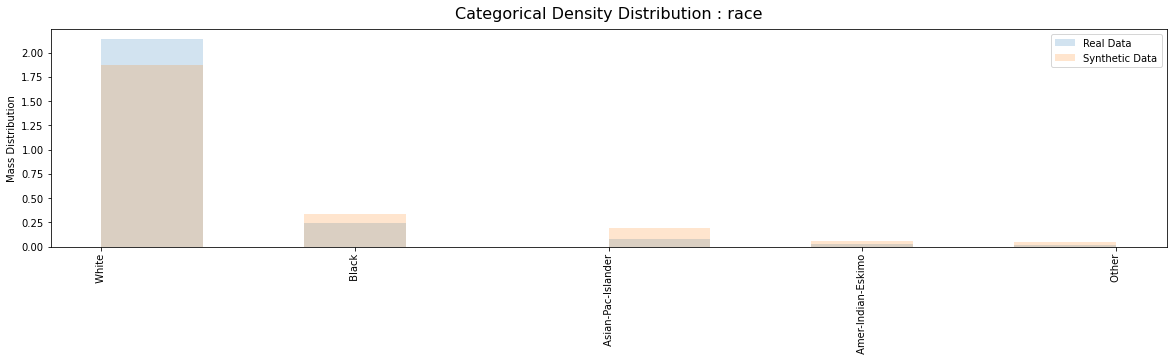

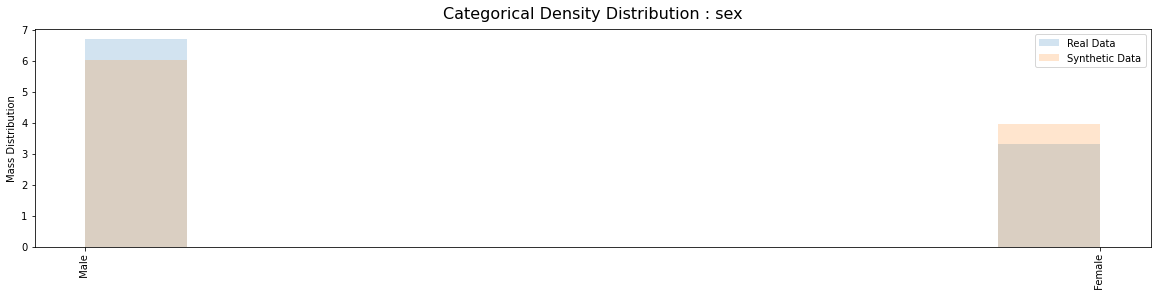

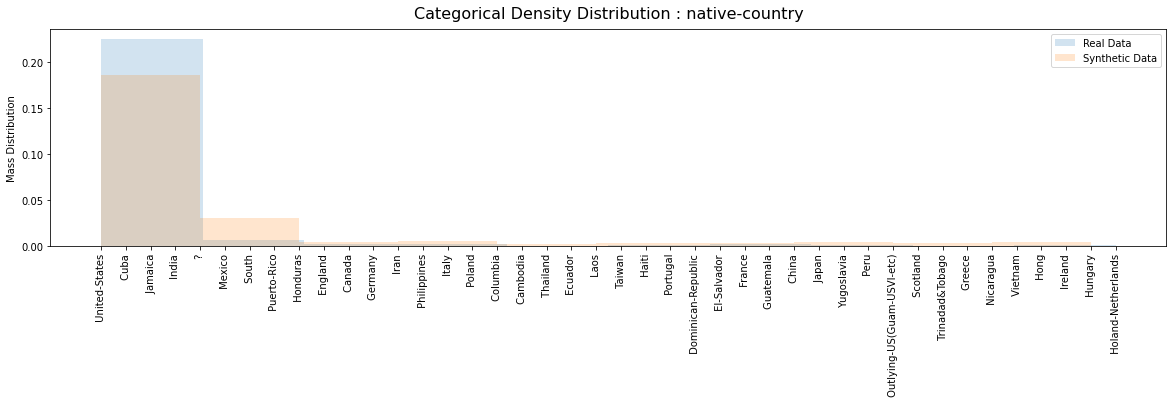

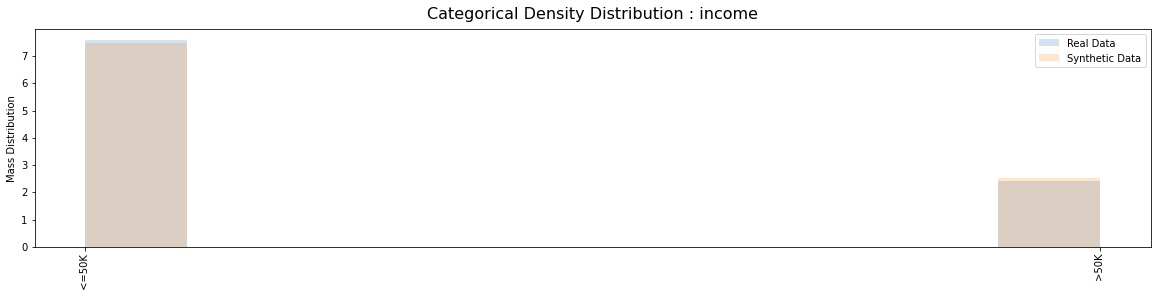

In [21]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [ ]:
synth.save('F:/Users/Kaggle/wids/NormalAPI.pth')

#### 

## Adversarial API: Non-privately differentiable synthesizer

In [22]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [23]:
synth.fit_adversarial(data=data,epochs=2,discrete_columns=discrete_columns,test_pct=0.33)

Generating train and test splits ...
TRAIN SAMPLES: n=21815
TEST SAMPLES: n=10746
Epoch: [0]  [  0/108]  eta: 0:00:05  loss_g: 2.1610 (2.1610)  loss_d: 0.0086 (0.0086)  loss: 2.1695 (2.1695)  time: 0.0469  data: 0.0000
Epoch: [0]  [ 50/108]  eta: 0:00:02  loss_g: 1.2711 (1.6818)  loss_d: -0.6999 (-0.6691)  loss: 0.5199 (1.0127)  time: 0.0468  data: 0.0000
Epoch: [0]  [100/108]  eta: 0:00:00  loss_g: 1.2106 (1.4828)  loss_d: 0.0506 (-0.4594)  loss: 1.1959 (1.0234)  time: 0.0452  data: 0.0000
Epoch: [0]  [108/108]  eta: 0:00:00  loss_g: 1.1943 (1.4642)  loss_d: 0.0689 (-0.4219)  loss: 1.2823 (1.0422)  time: 0.0467  data: 0.0000
Epoch: [0] Total time: 0:00:05
Epoch: [1]  [  0/108]  eta: 0:00:05  loss_g: 1.2196 (1.2196)  loss_d: 0.2364 (0.2364)  loss: 1.4560 (1.4560)  time: 0.0469  data: 0.0000
Epoch: [1]  [ 50/108]  eta: 0:00:02  loss_g: 0.9587 (0.9586)  loss_d: 0.2341 (0.1635)  loss: 1.0600 (1.1220)  time: 0.0459  data: 0.0000
Epoch: [1]  [100/108]  eta: 0:00:00  loss_g: 1.5019 (1.0740) 

In [24]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

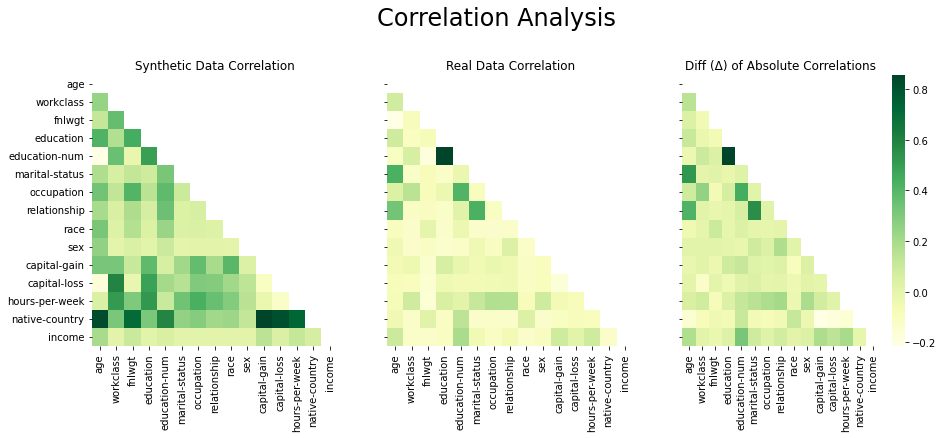

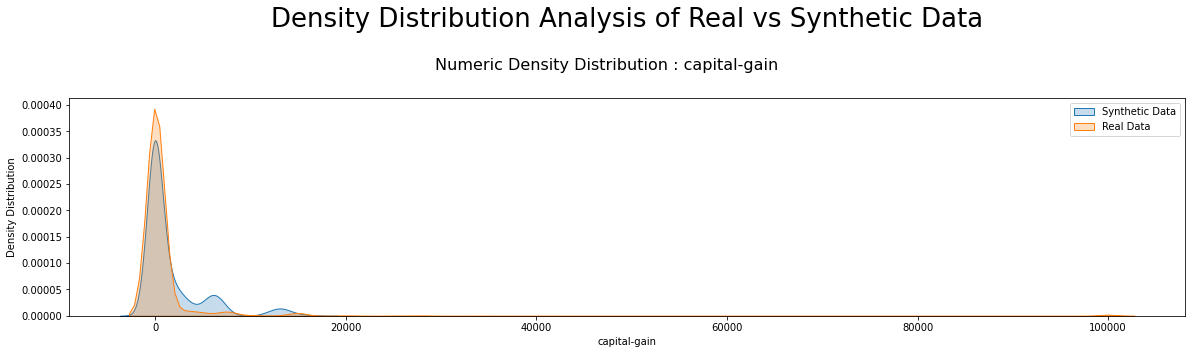

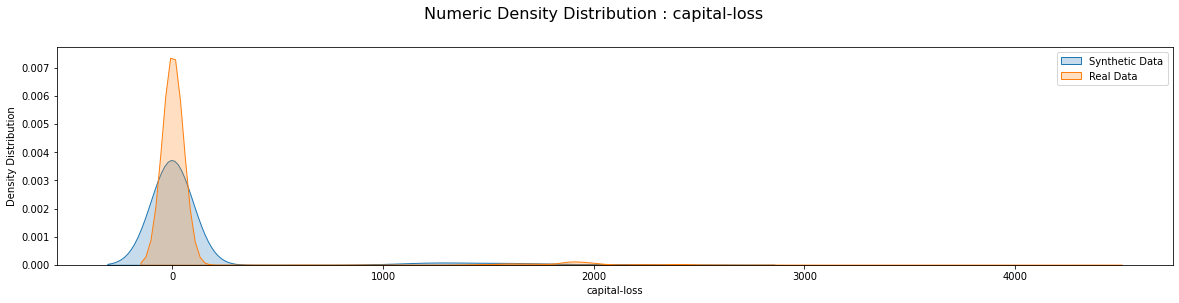

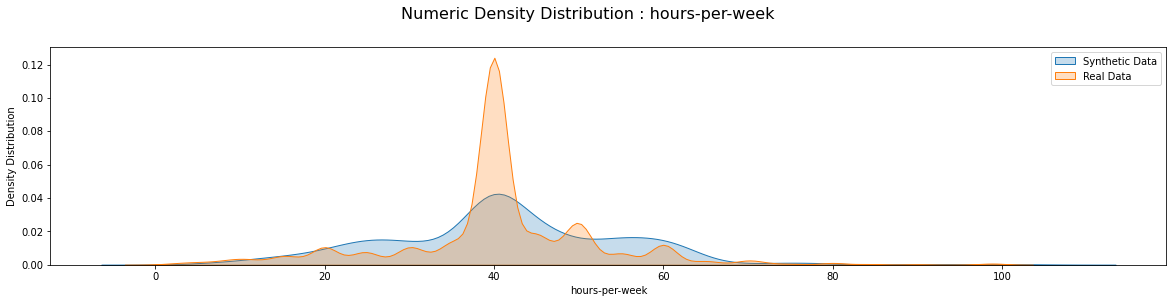

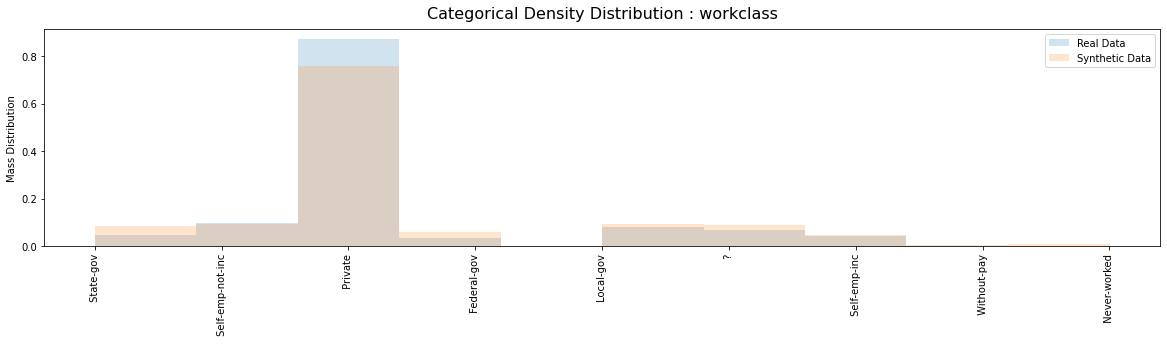

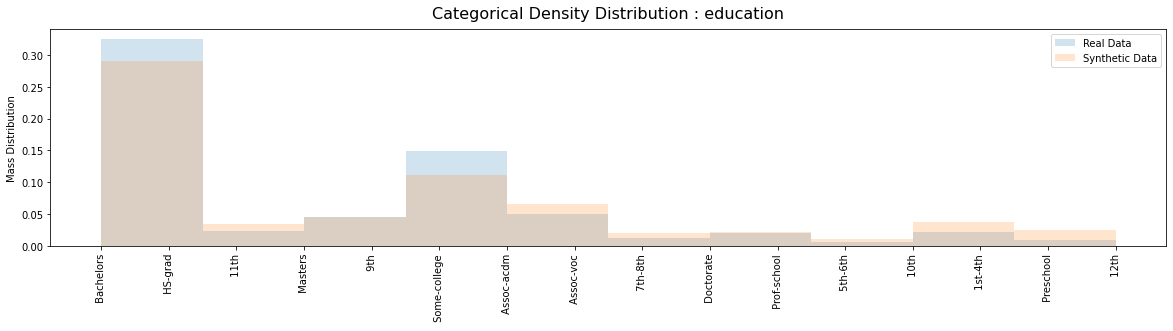

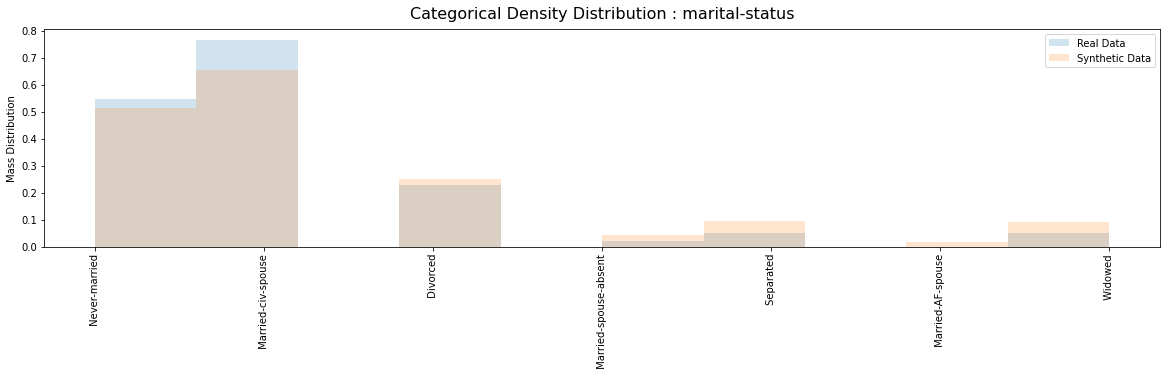

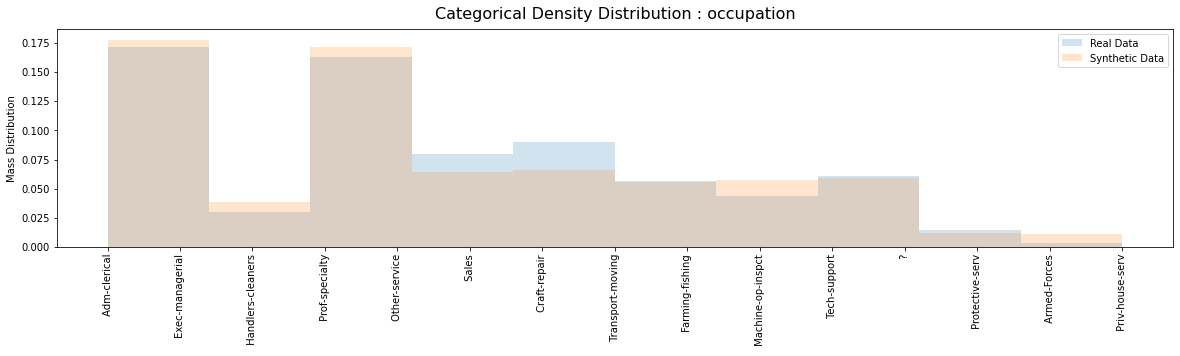

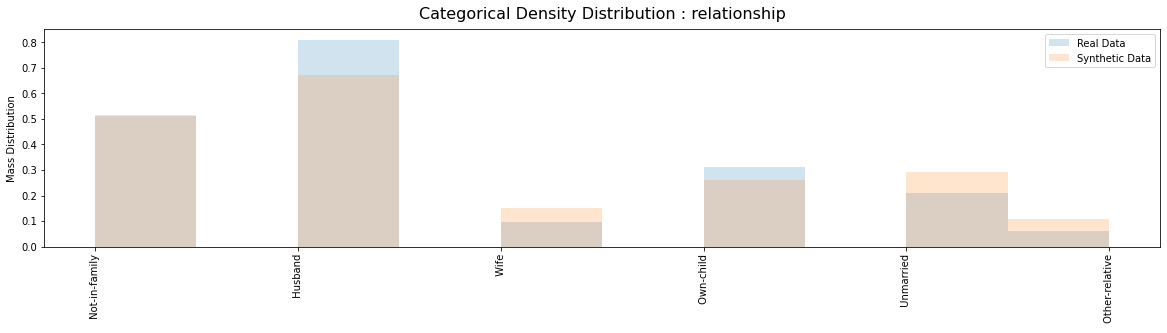

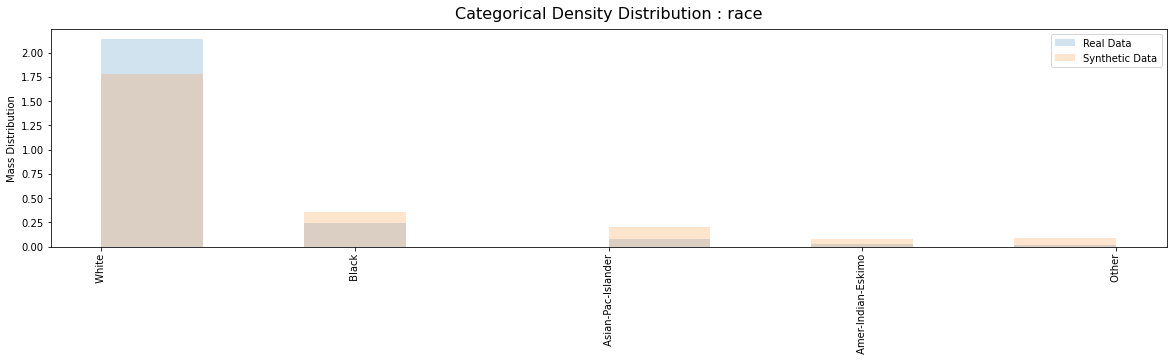

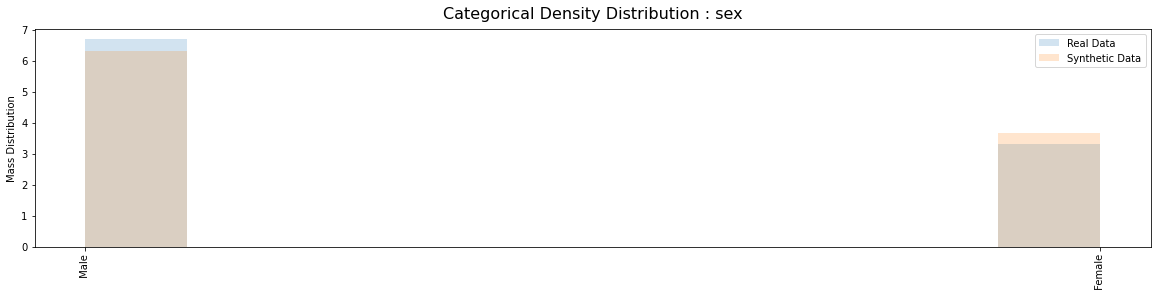

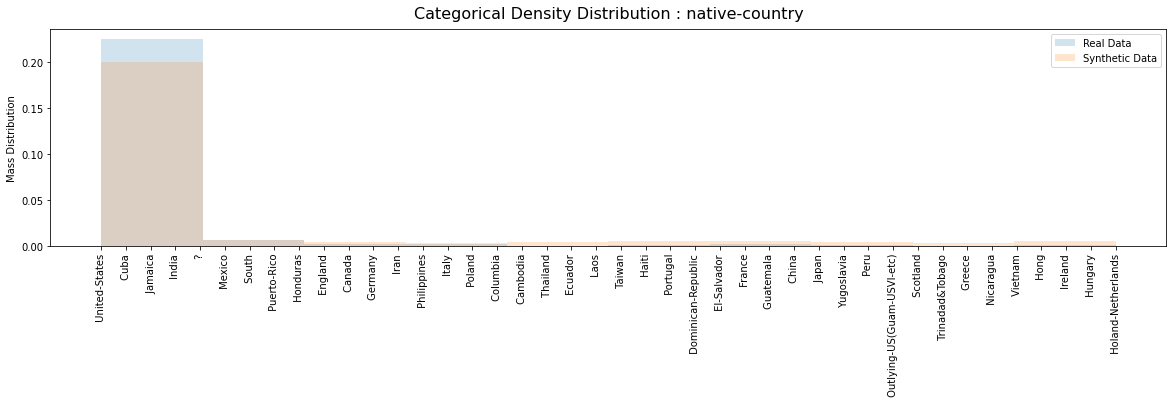

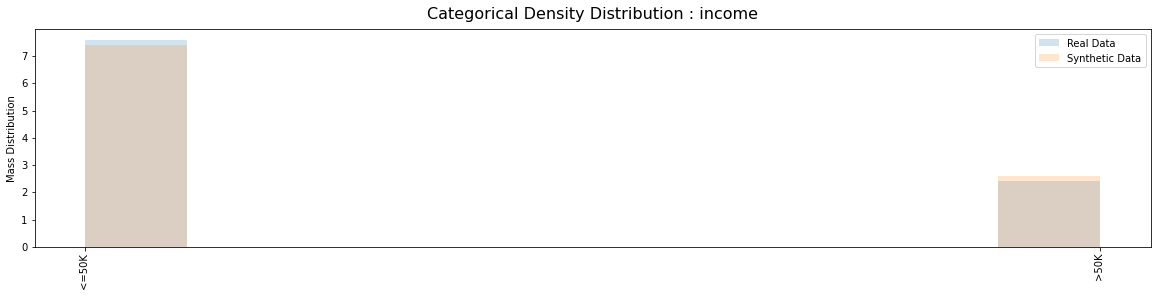

In [25]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

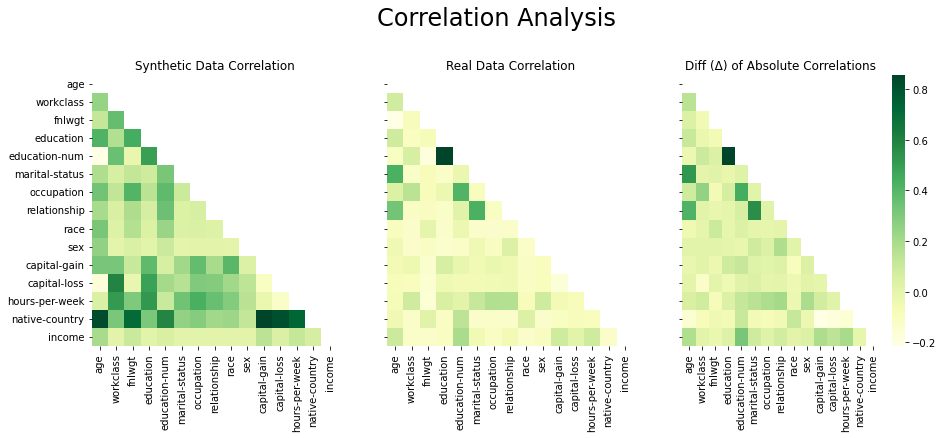

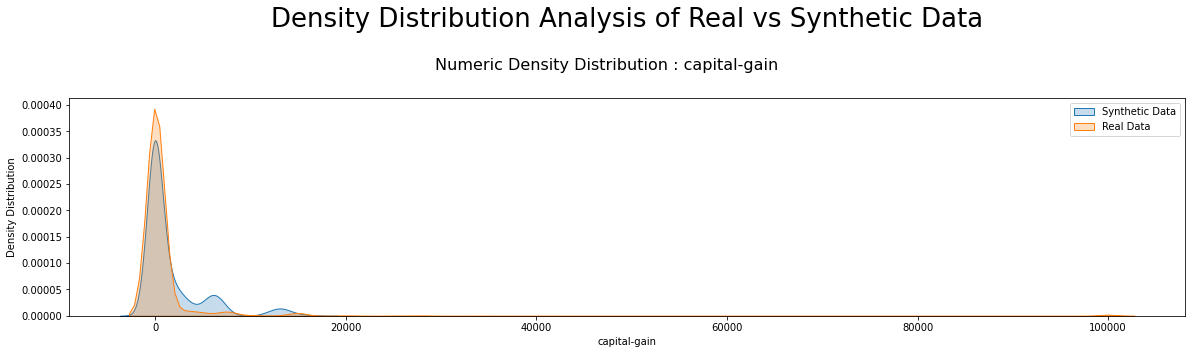

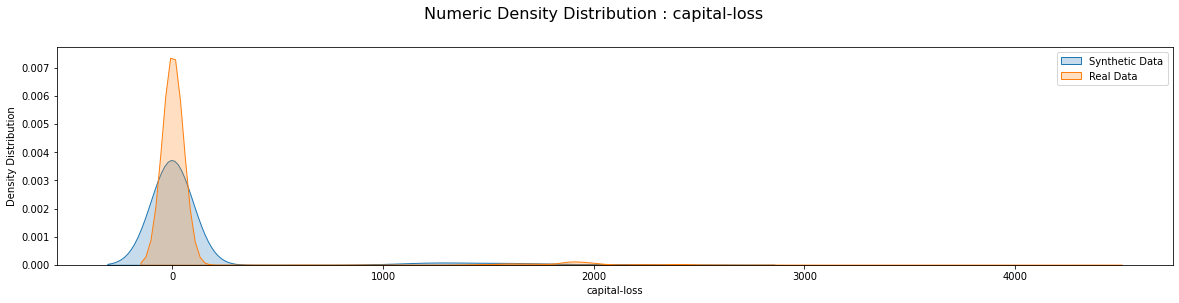

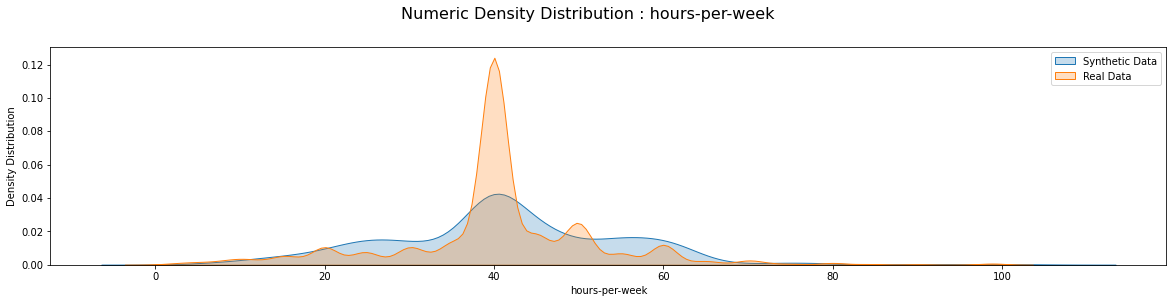

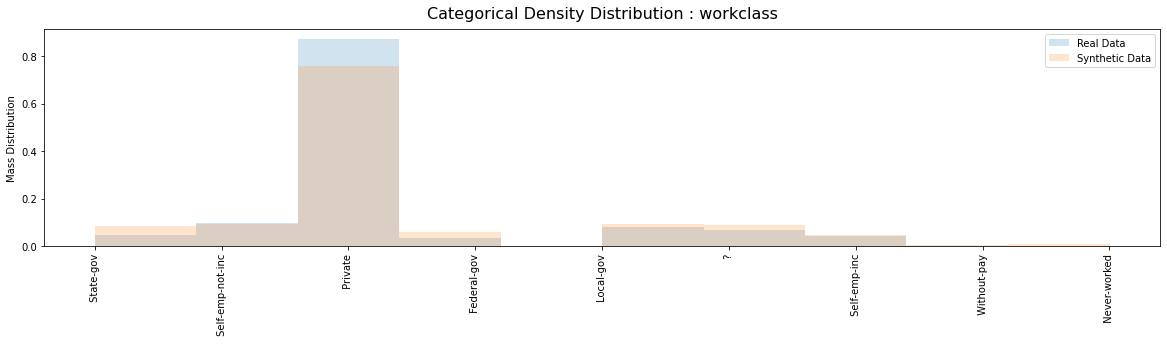

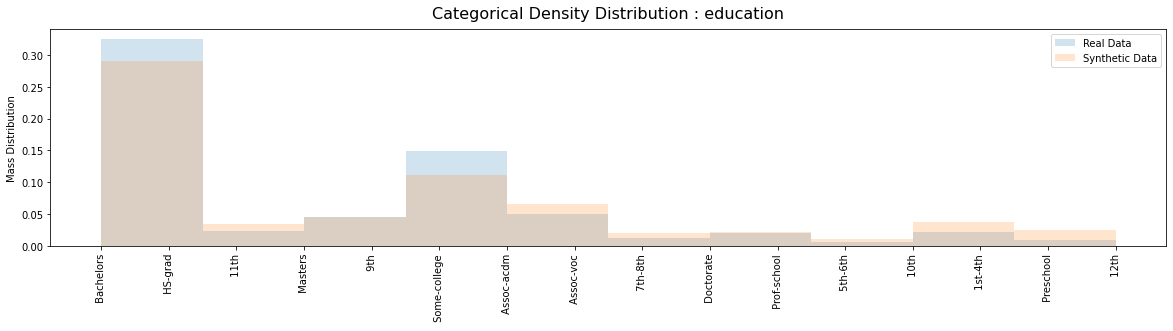

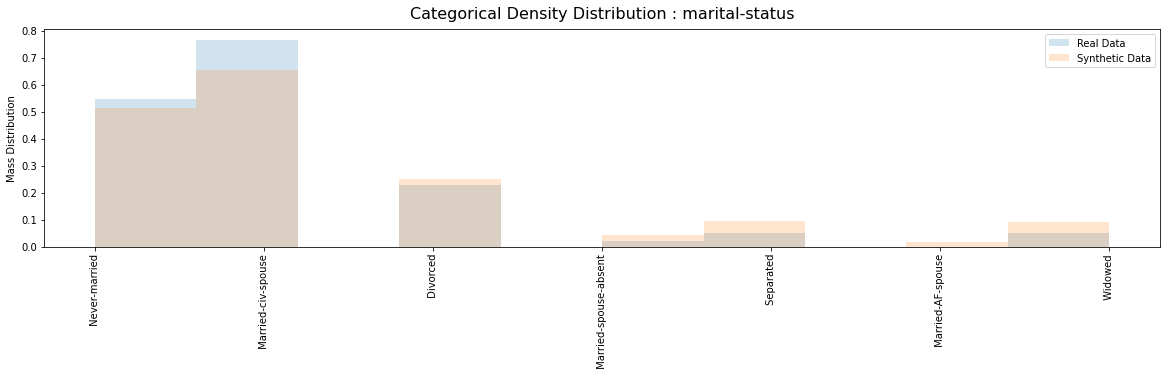

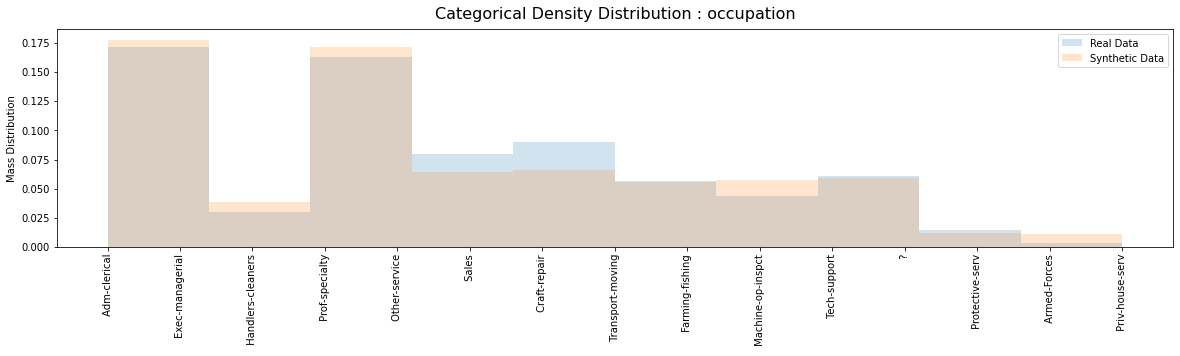

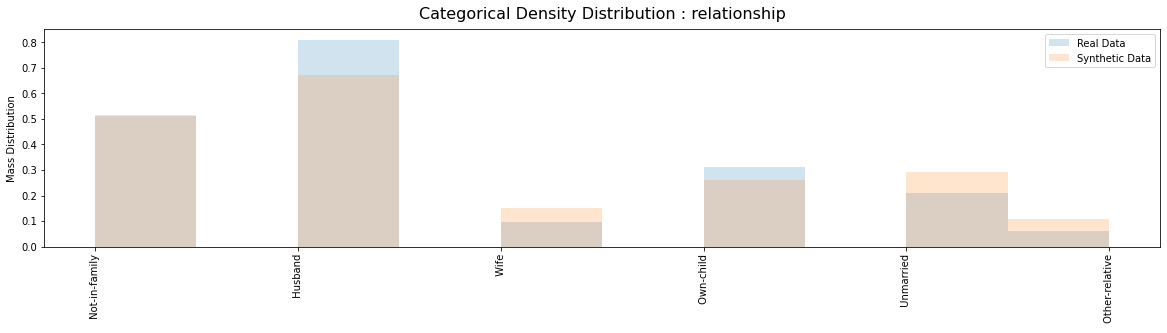

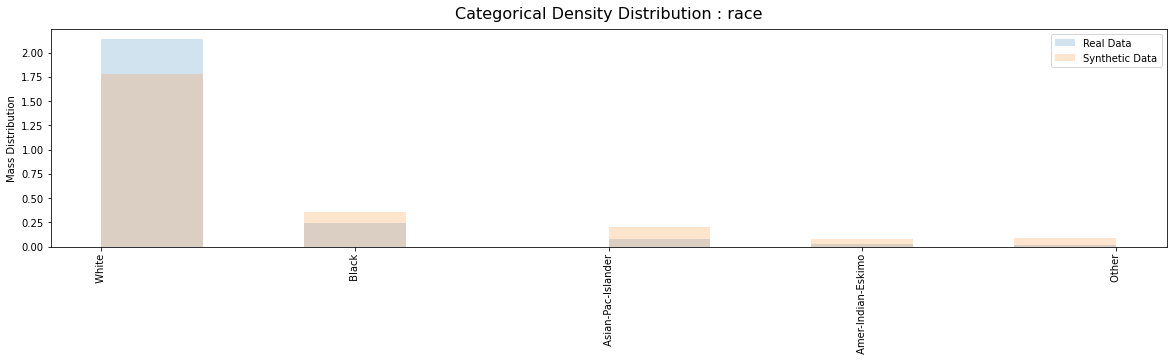

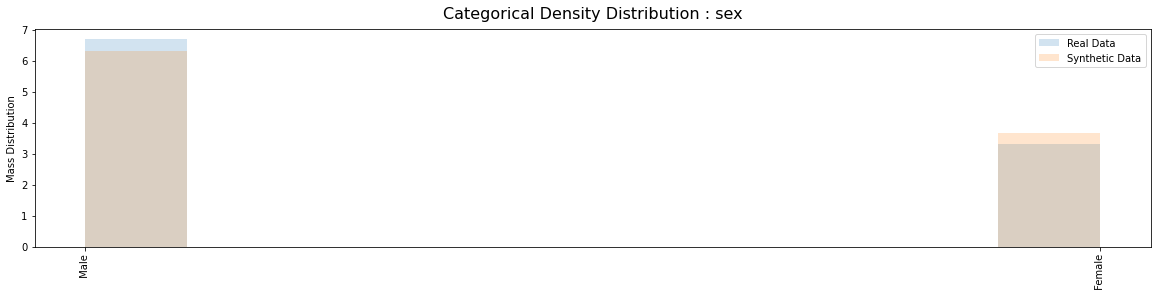

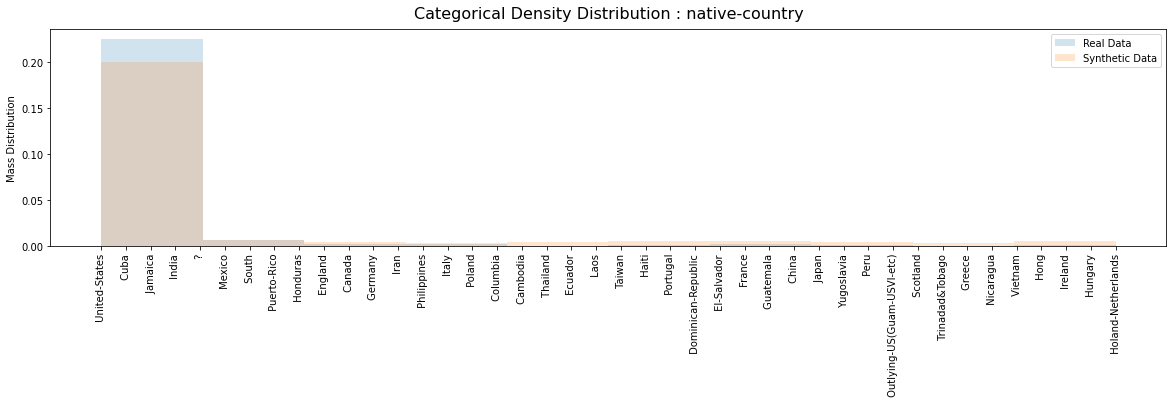

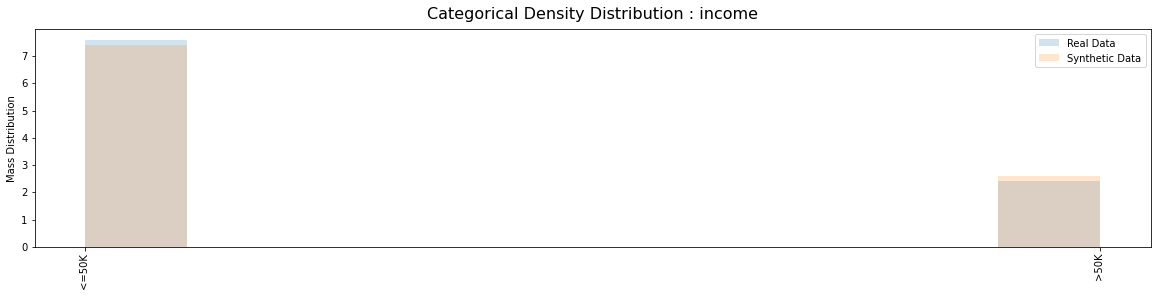

In [26]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

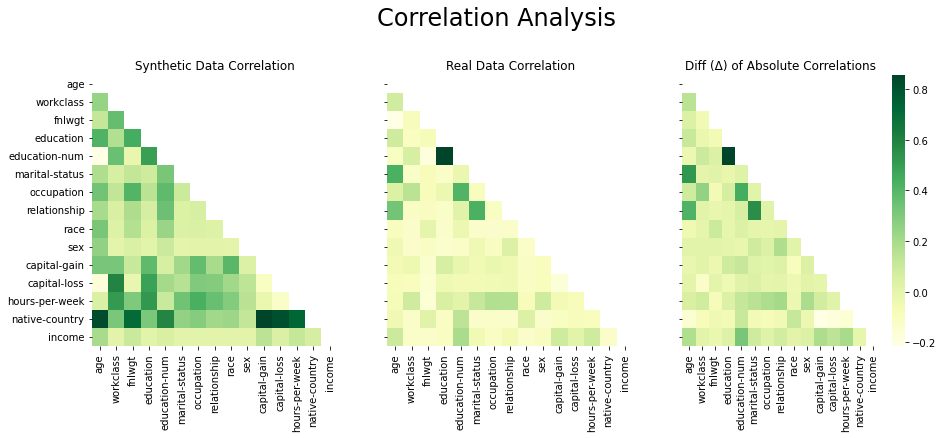

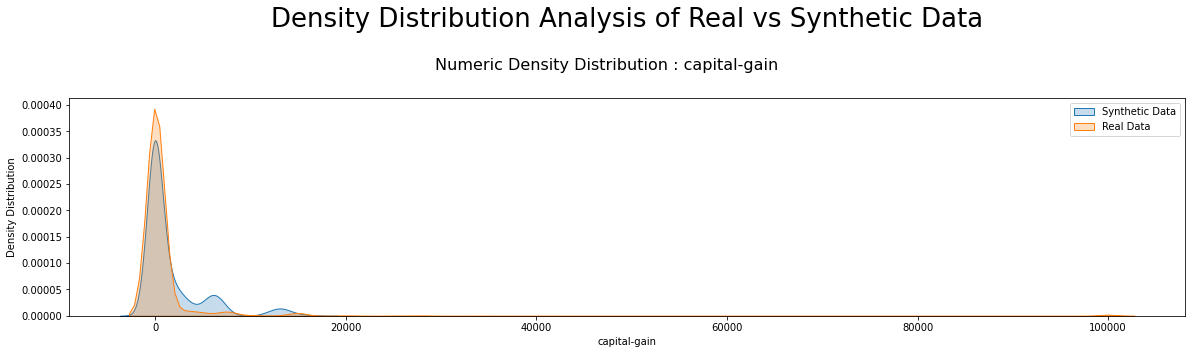

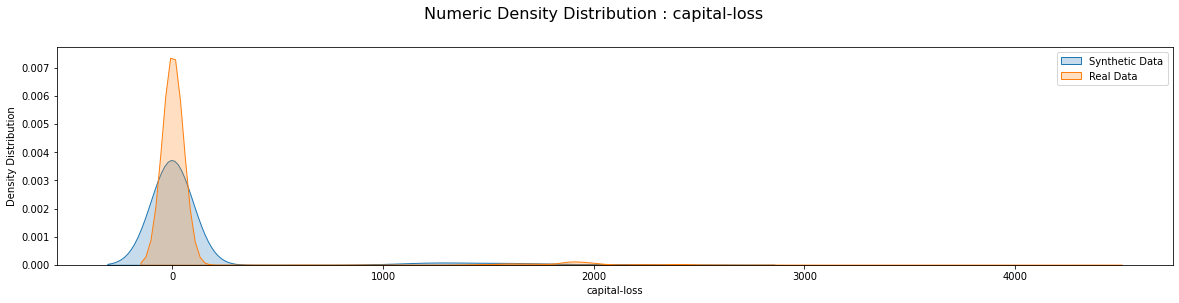

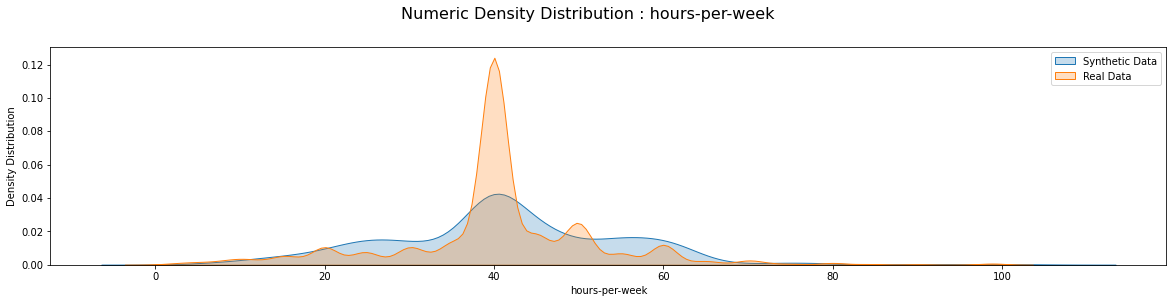

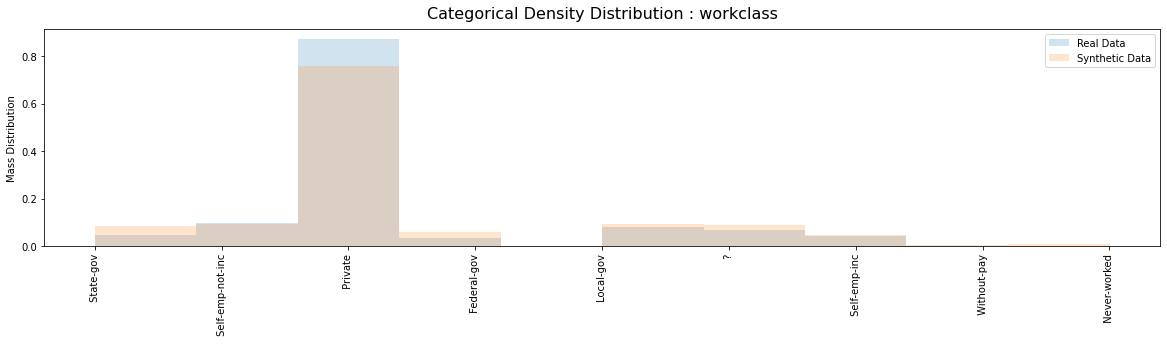

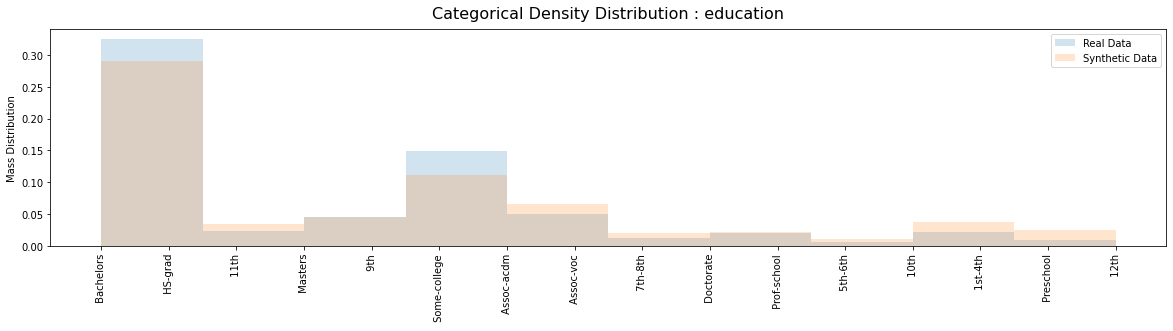

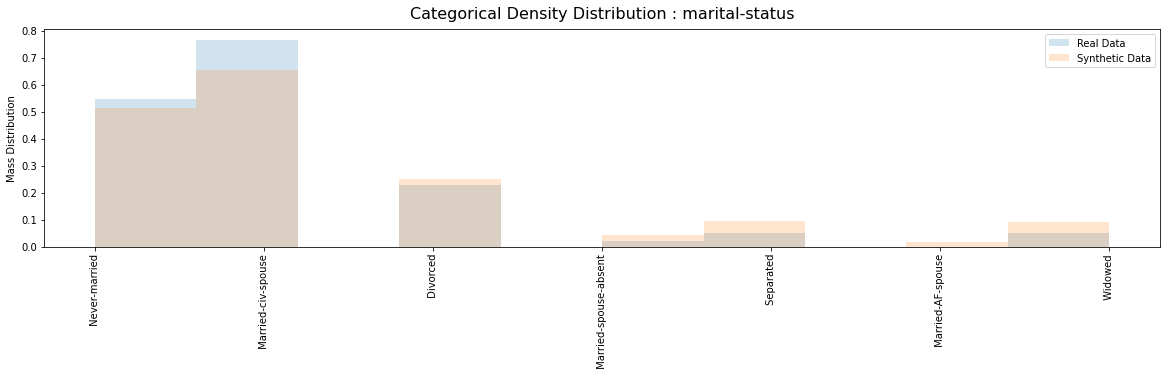

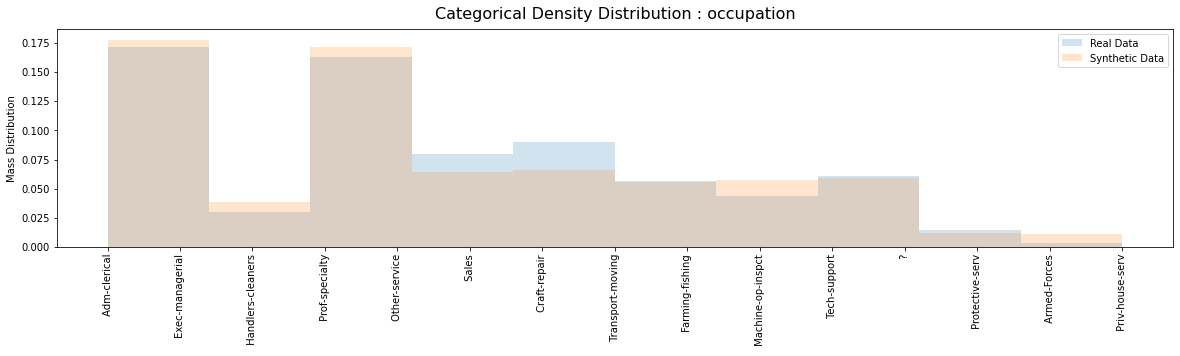

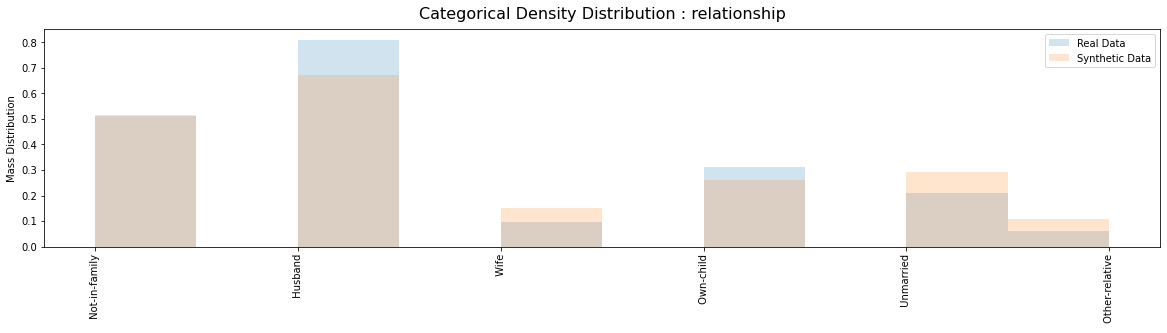

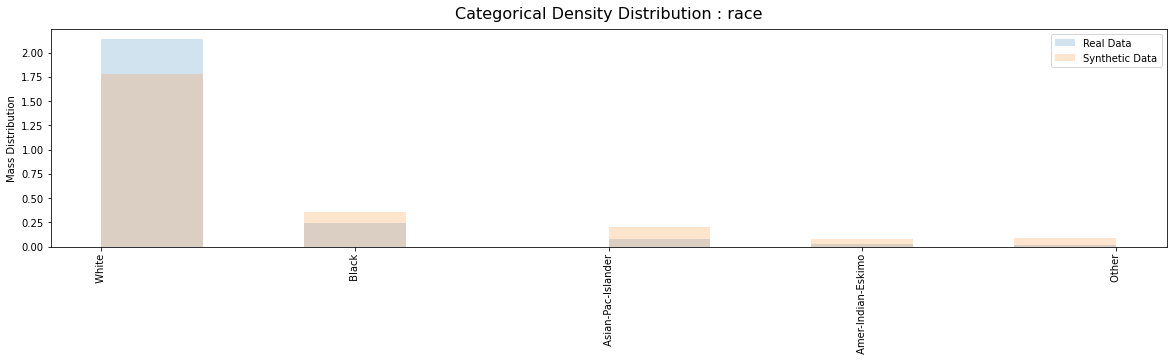

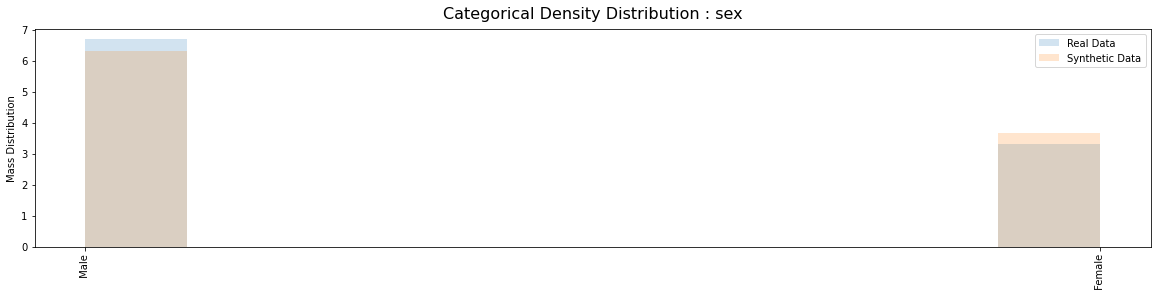

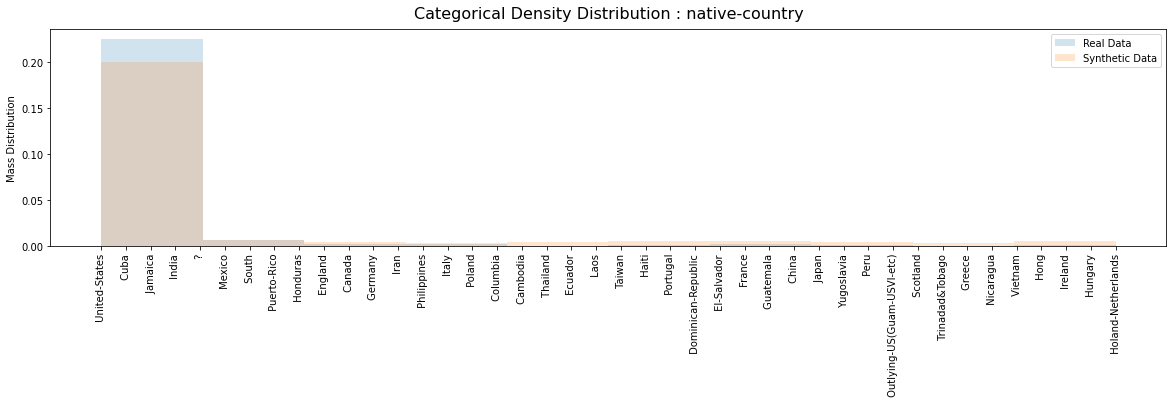

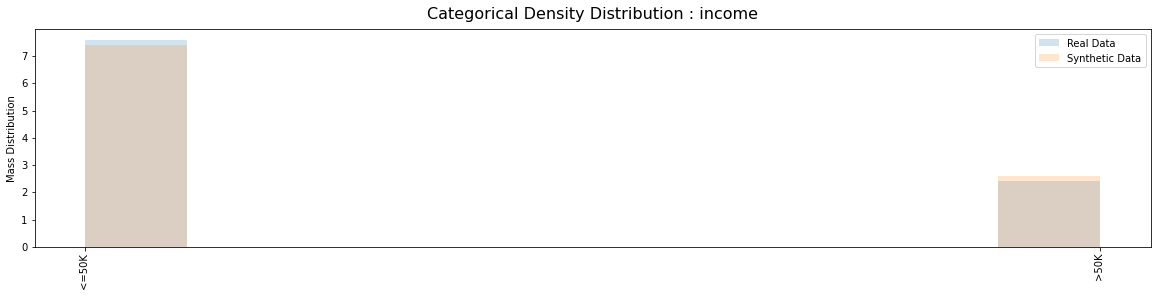

In [27]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [ ]:
synth.save('F:/Users/Kaggle/wids/AdversarialAPI.pth')

#### 

## Normal API: Privately differentiable synthesizer

In [28]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cpu')   ### cpu else cuda

In [29]:
synth.fit(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Iteration: [1]  [  0/159]  eta: 0:01:32  loss_t_fake: 0.6249 (0.7332)  loss_t_real: 0.6777 (0.6926)  time: 0.5806  data: 0.0010
Iteration: [1]  [ 50/159]  eta: 0:01:06  loss_t_fake: 0.0075 (0.0973)  loss_t_real: 0.0547 (0.2829)  time: 0.6181  data: 0.0000
Iteration: [1]  [100/159]  eta: 0:00:36  loss_t_fake: 0.0015 (0.0510)  loss_t_real: 0.0114 (0.1546)  time: 0.6014  data: 0.0000
Iteration: [1]  [150/159]  eta: 0:00:05  loss_t_fake: 0.0006 (0.0344)  loss_t_real: 0.0039 (0.1055)  time: 0.5648  data: 0.0000
Iteration: [1]  [159/159]  eta: 0:00:00  loss_t_fake: 0.0006 (0.0325)  loss_t_real: 0.0032 (0.0998)  time: 0.5760  data: 0.0000
Iteration: [1] Total time: 0:01:35
Iteration: [1]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0006 (0.0325)  loss_t_real: 0.0032 (0.0998)  loss_s: 0.6954 (0.7071)  time: 0.1212  data: 0.0000
Iteration: [1]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0006 (0.0325)  loss_t_real: 0.0032 (0.0998)  loss_s: 0.6954 (0.7001)  time: 0.1134  data: 0.0000
Iteration: [1]  [2/4]  eta:

In [30]:
sample = synth.sample(1000)

In [31]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

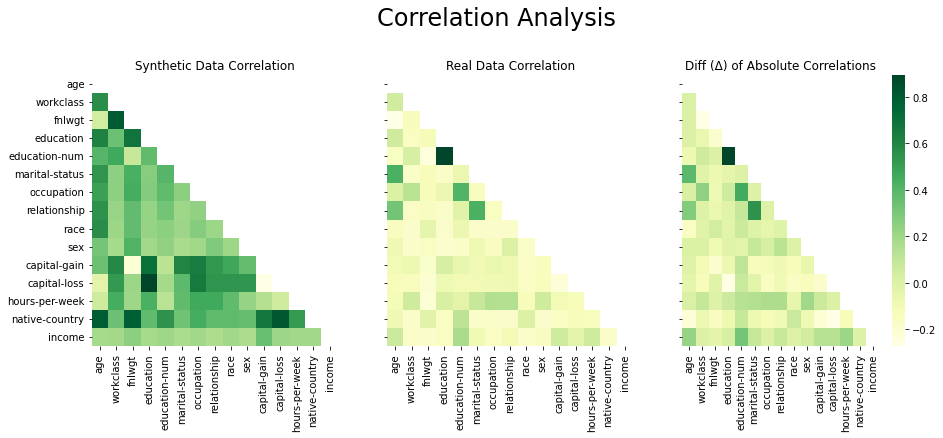

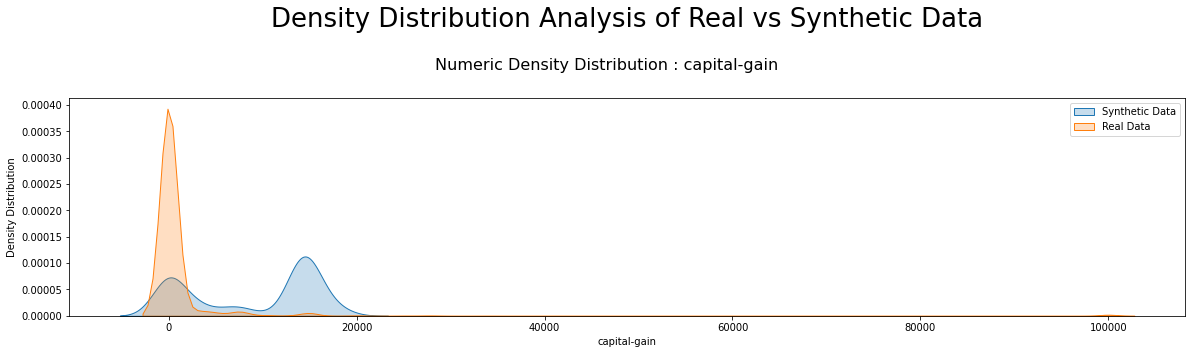

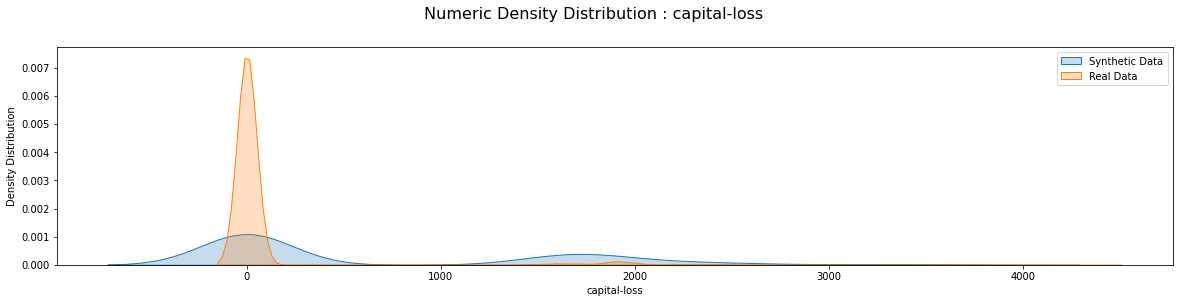

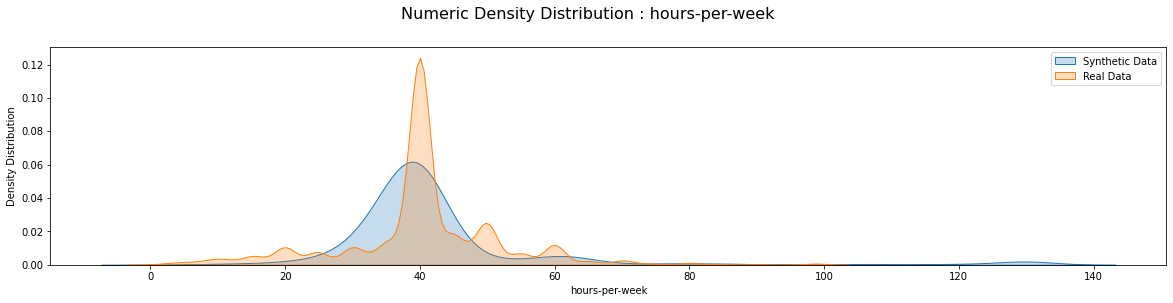

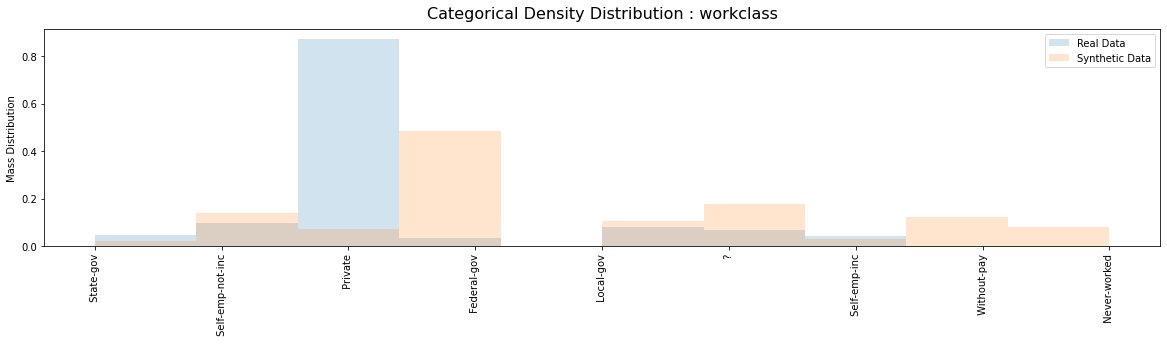

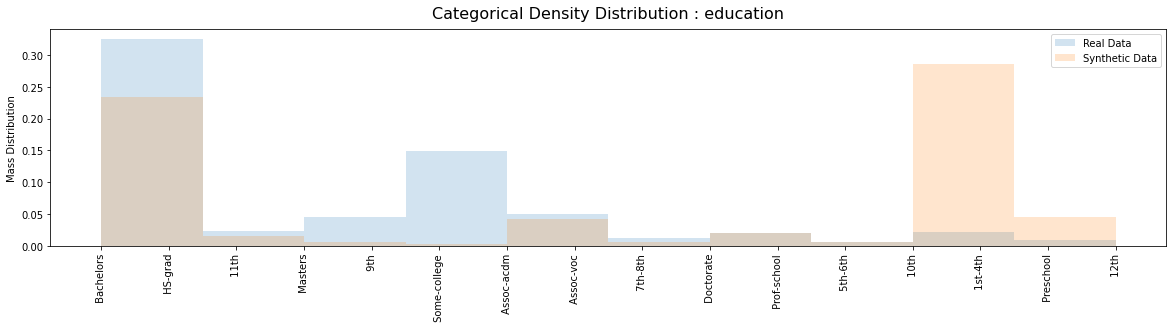

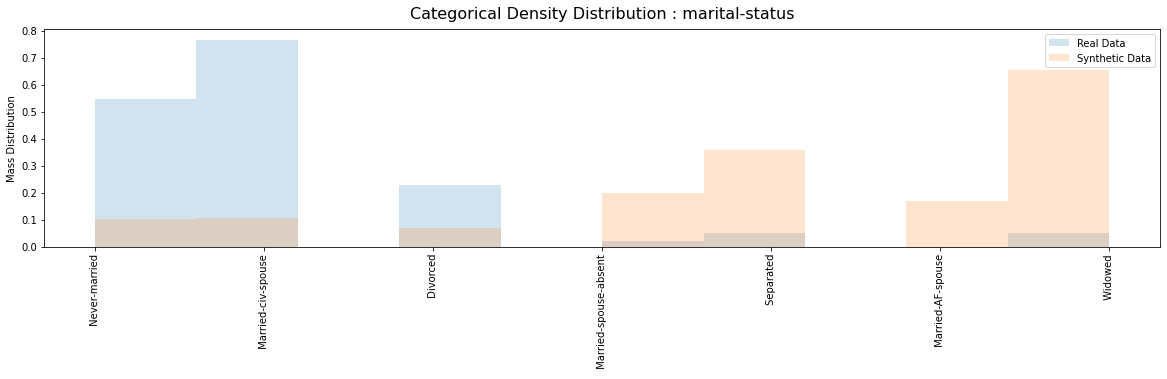

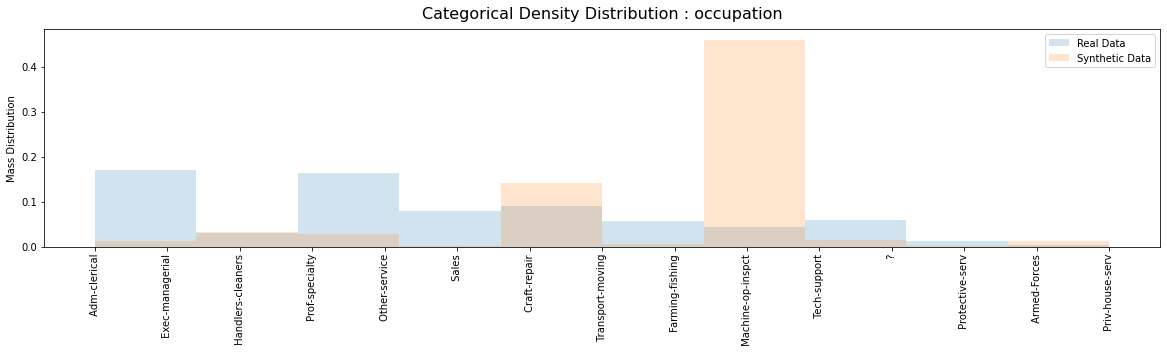

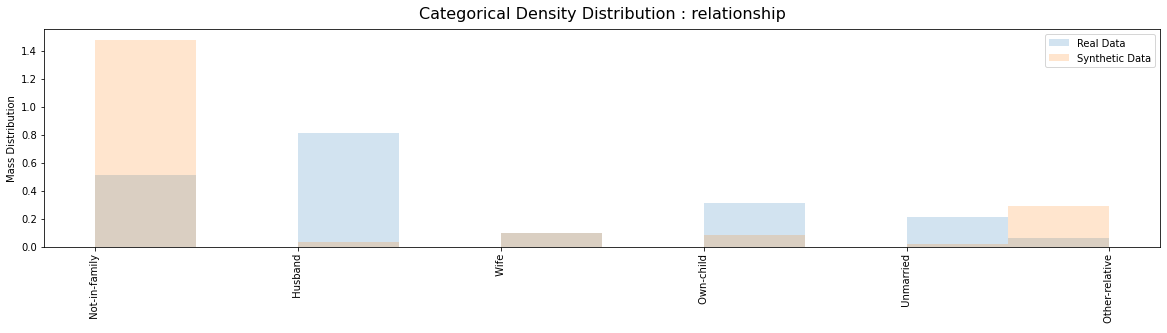

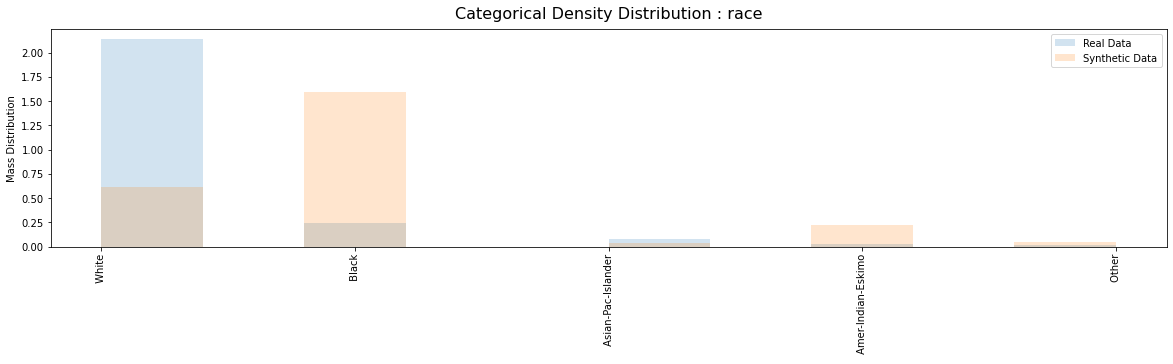

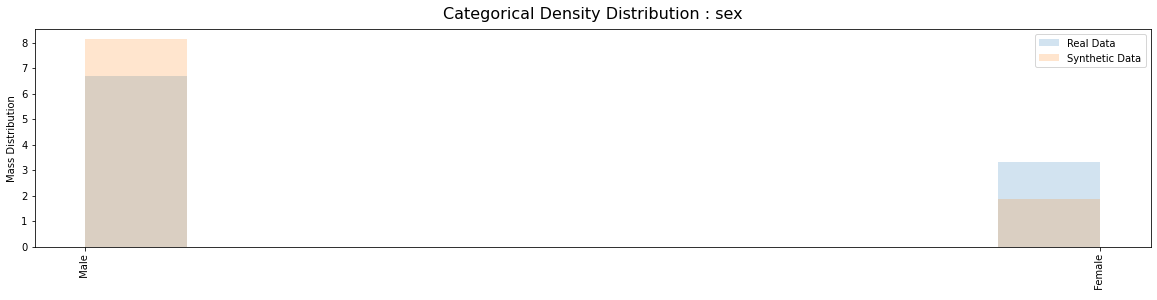

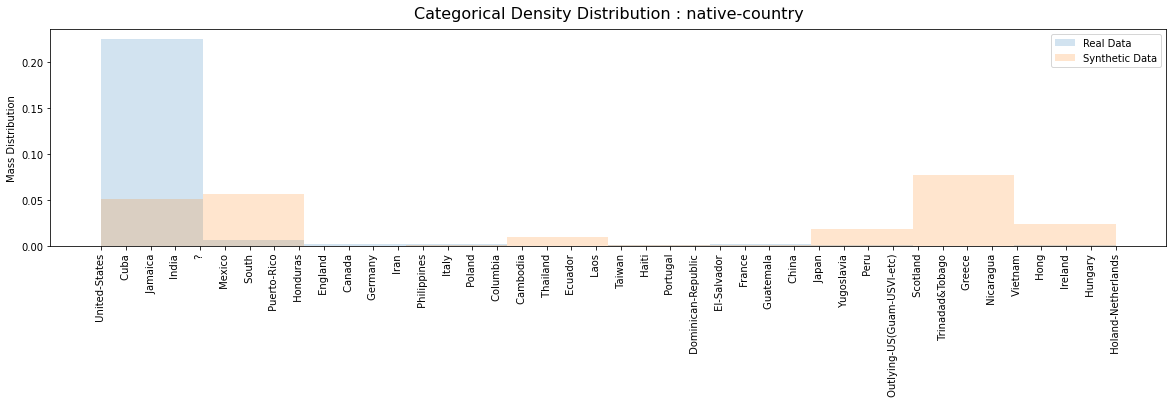

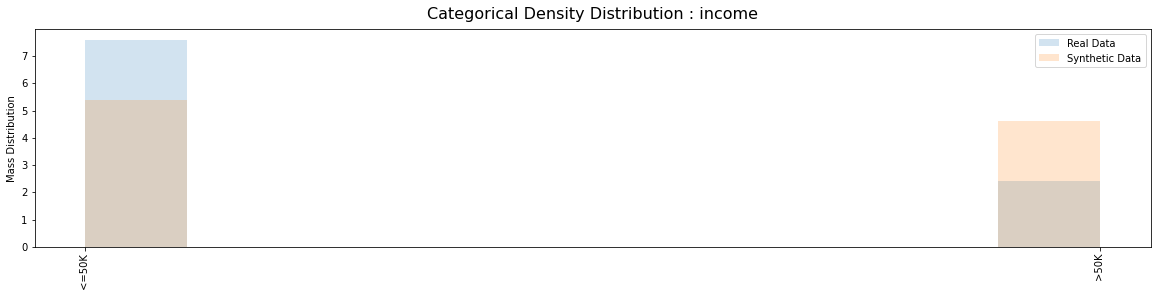

In [32]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

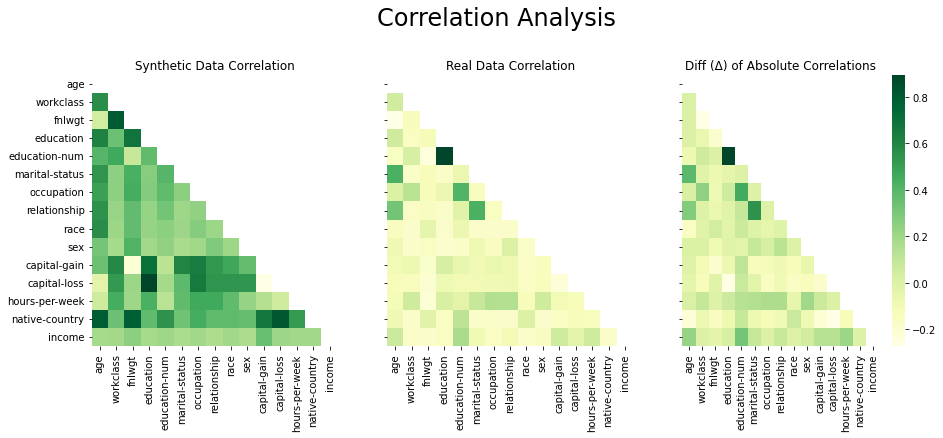

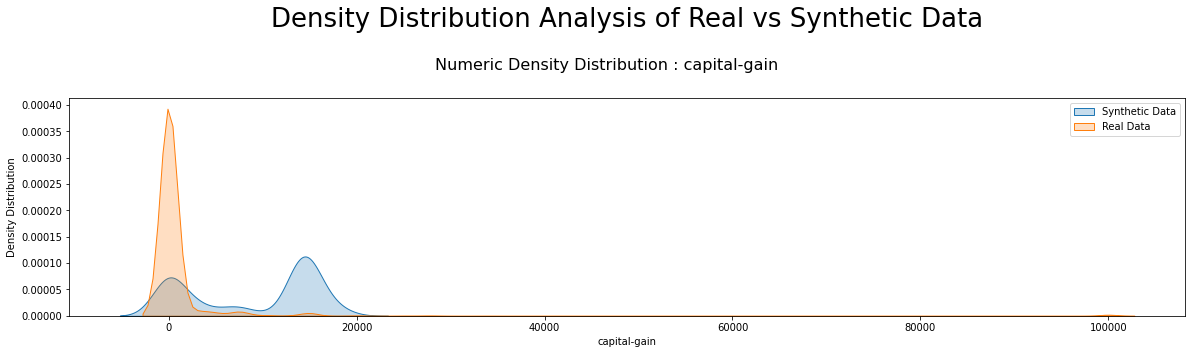

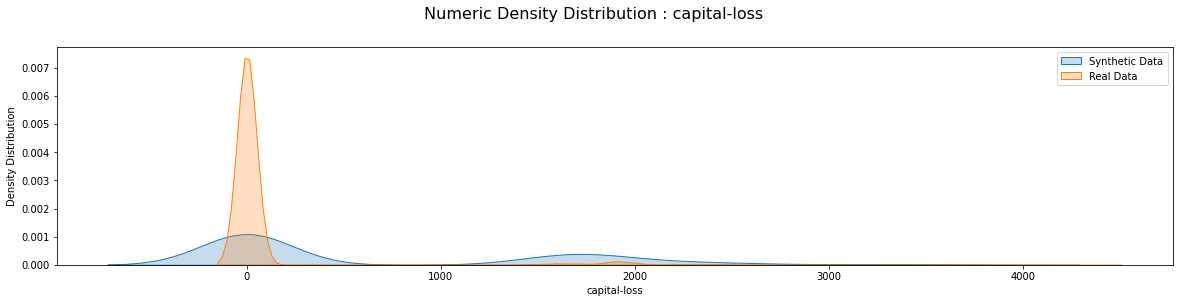

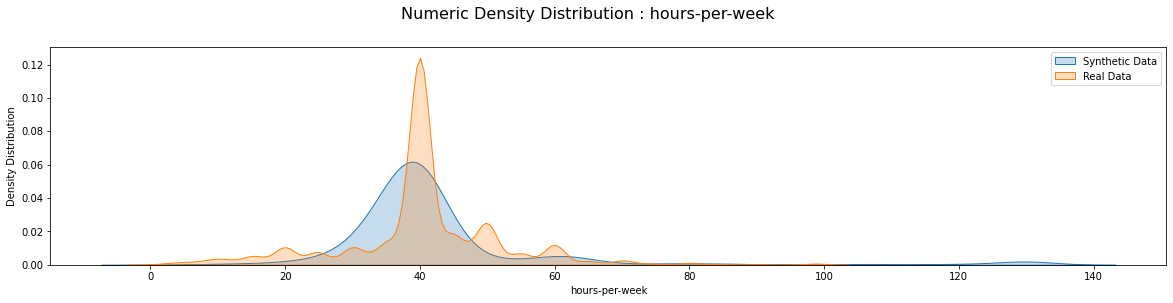

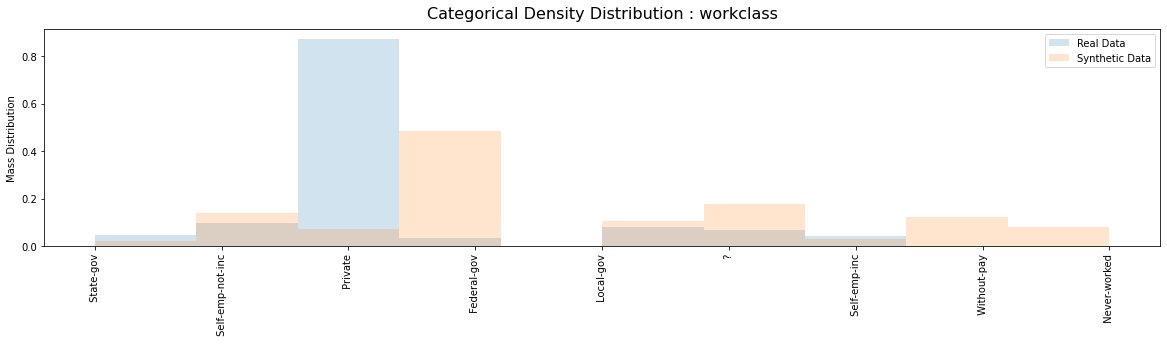

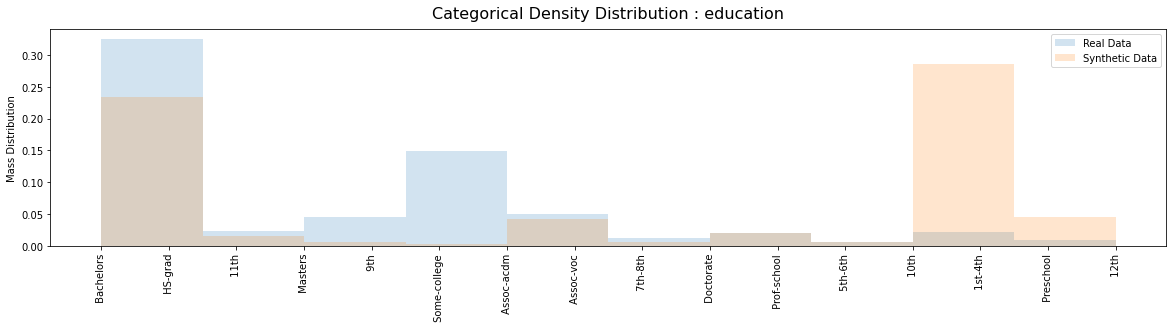

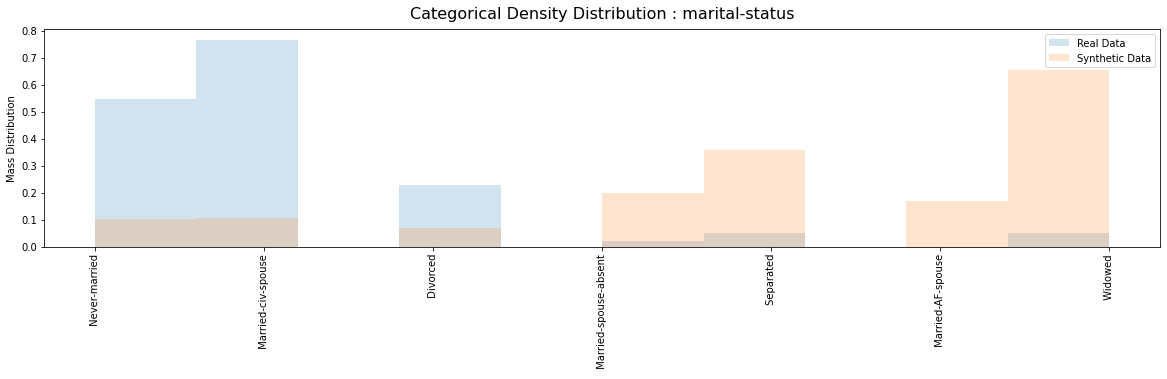

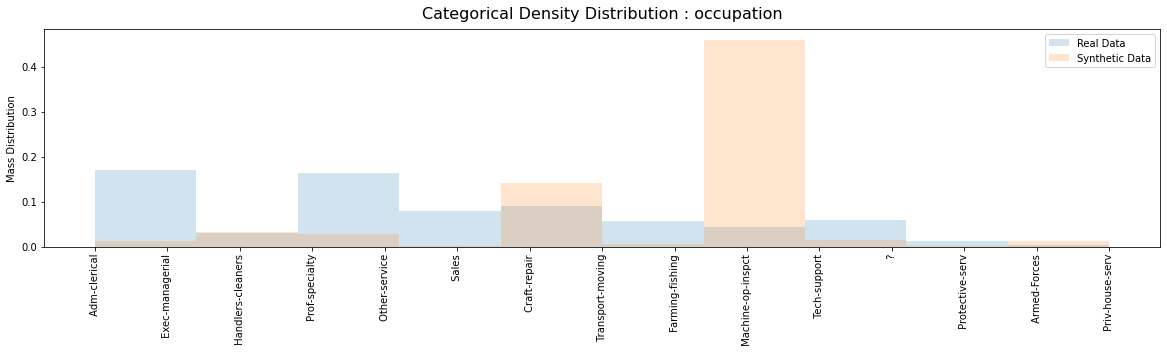

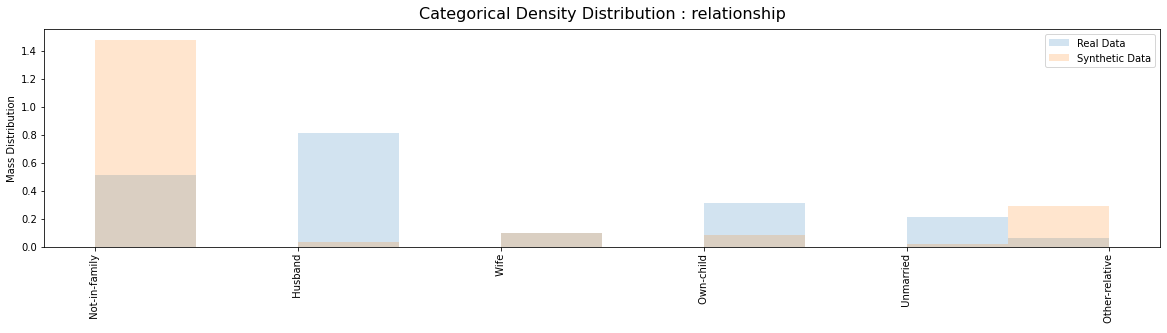

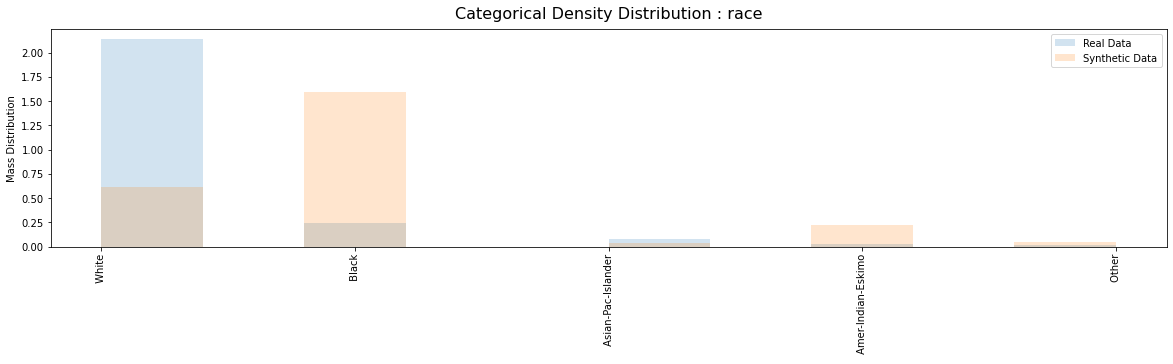

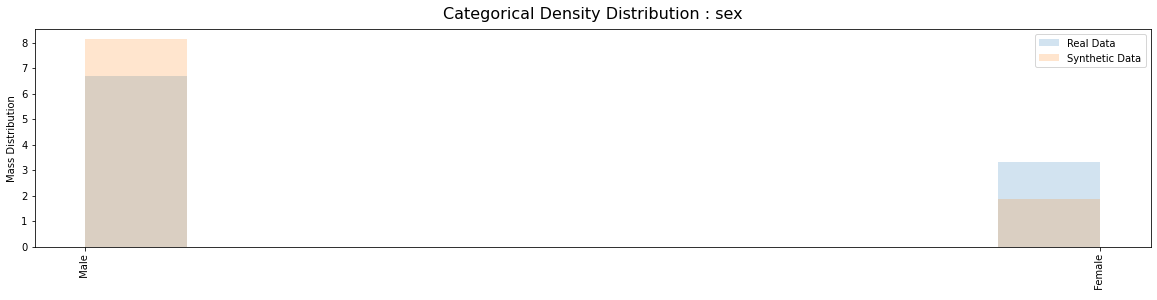

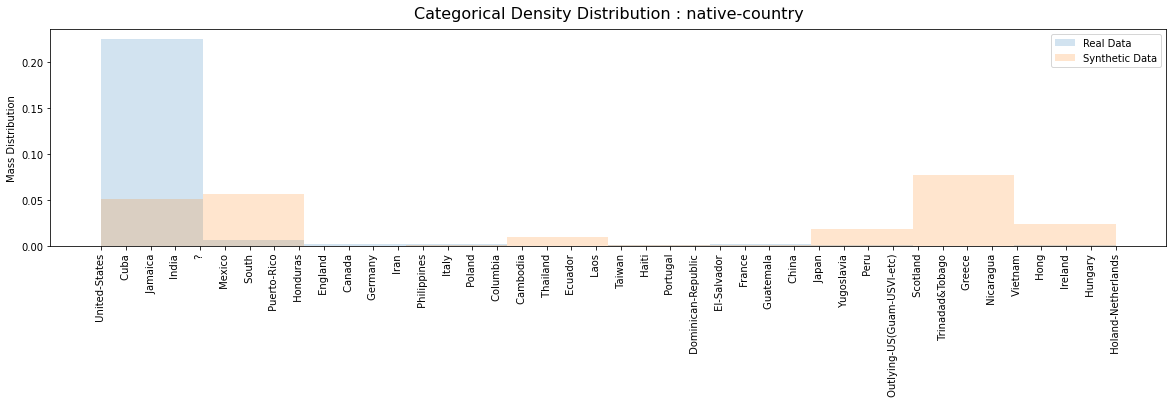

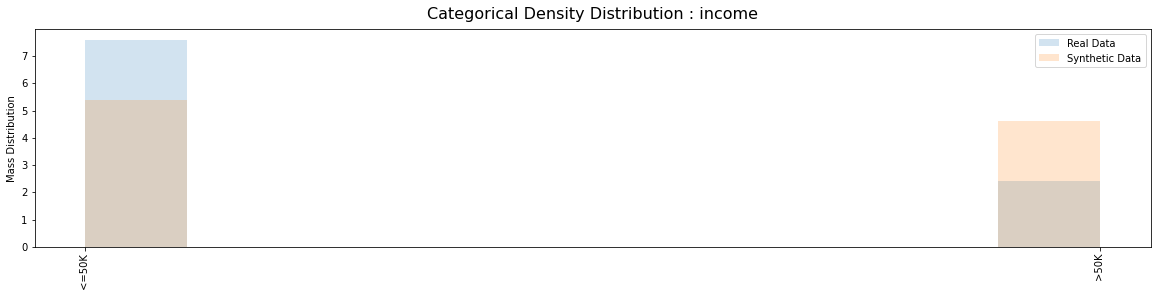

In [33]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

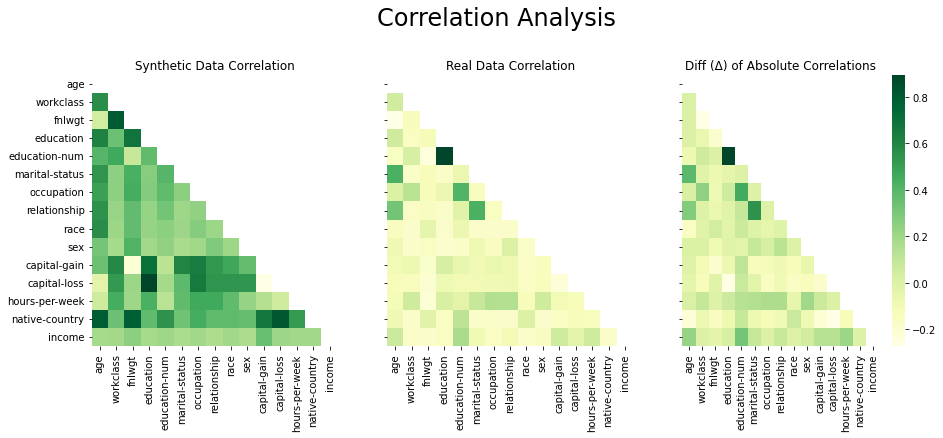

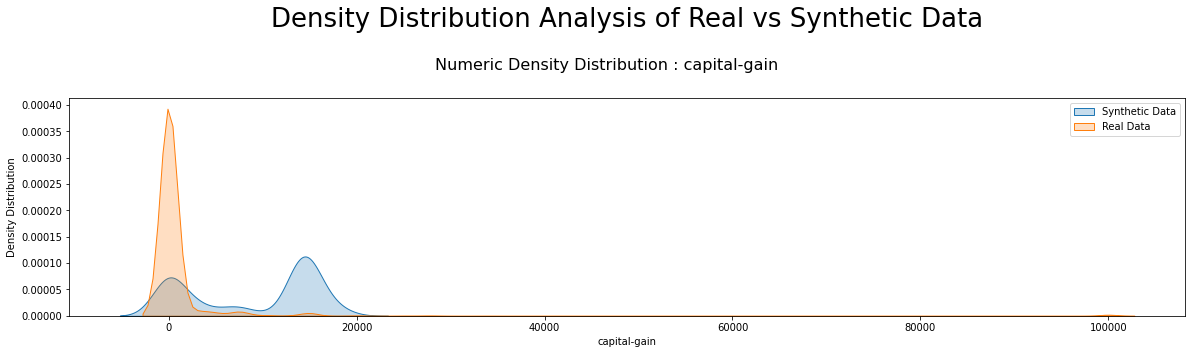

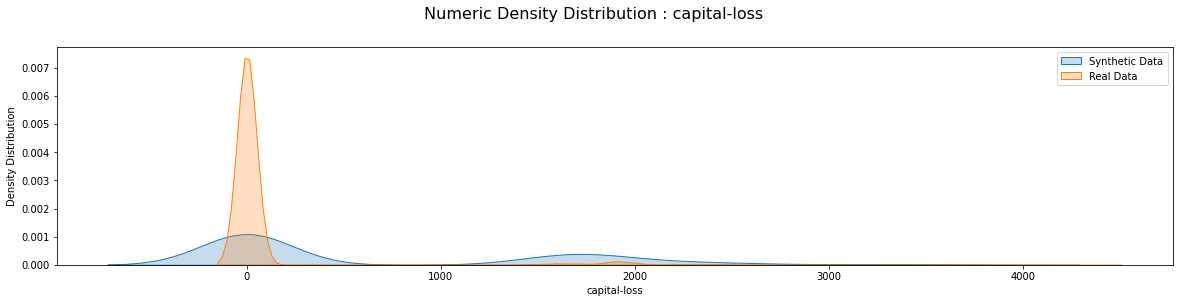

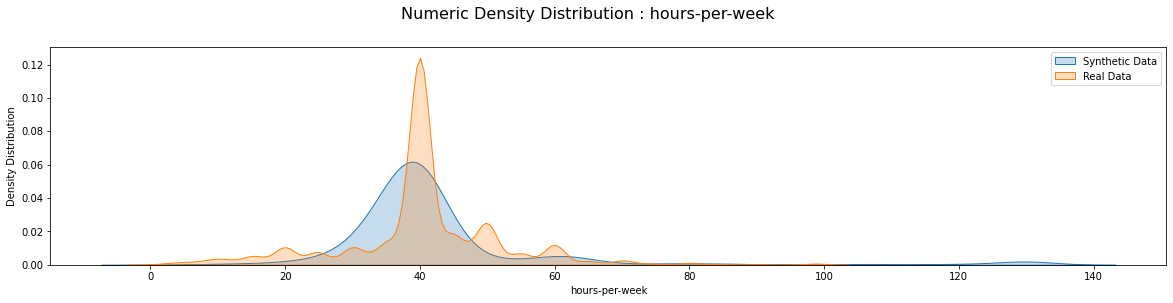

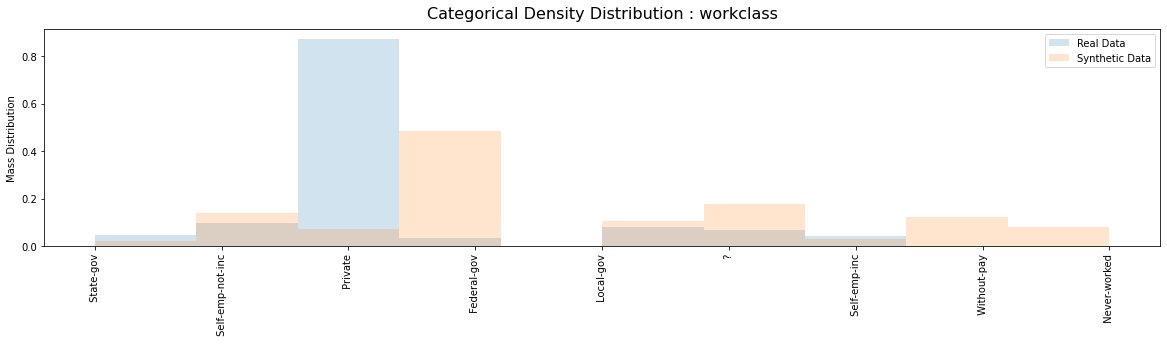

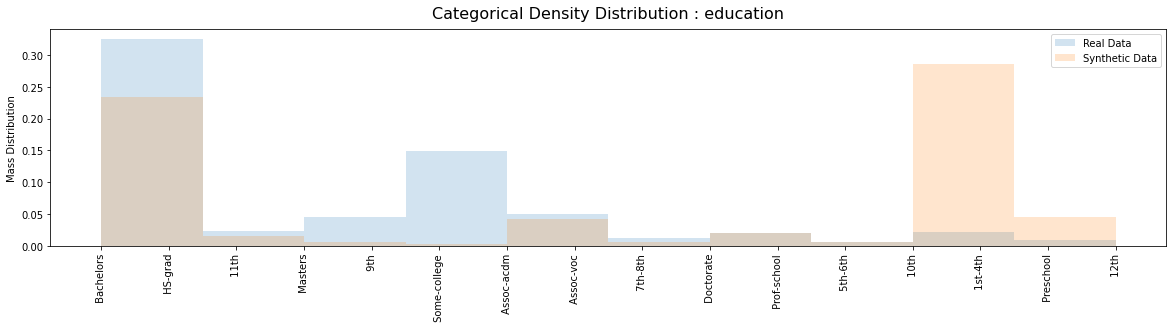

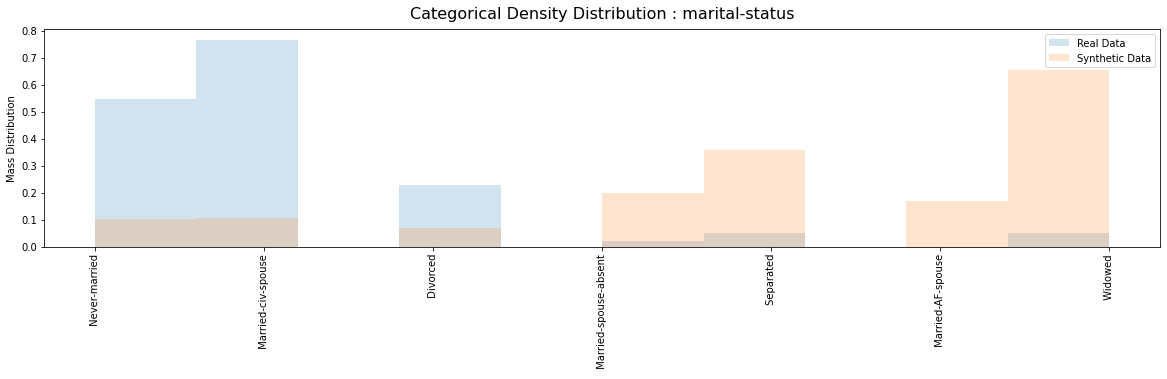

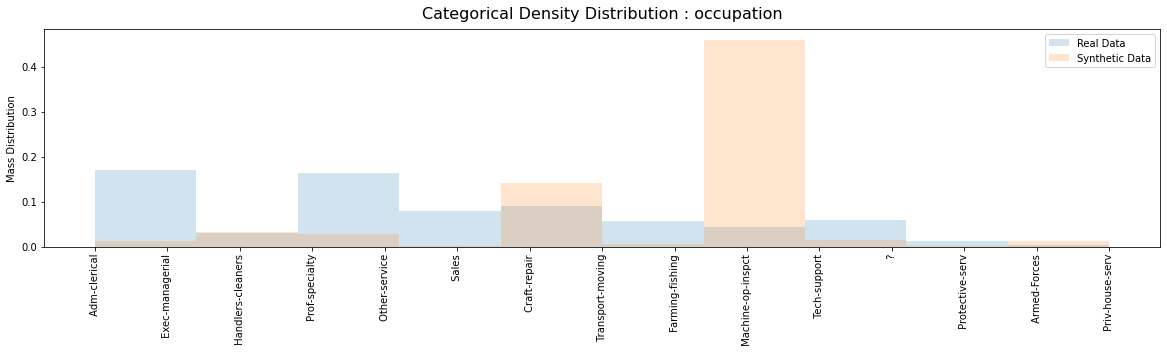

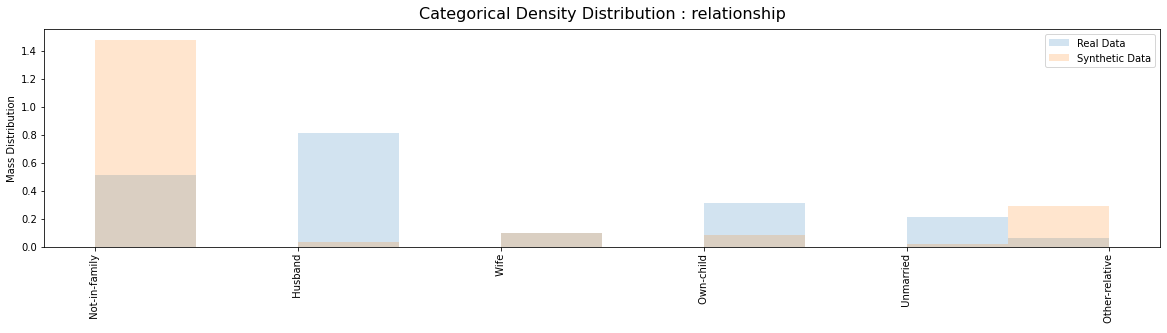

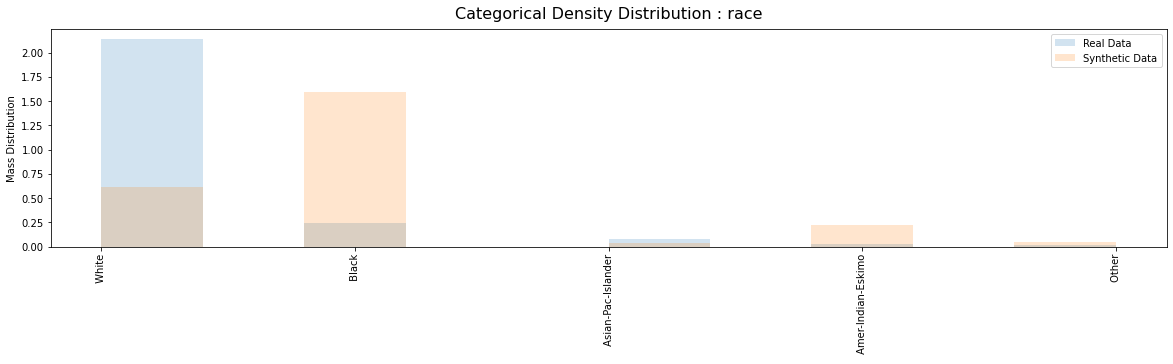

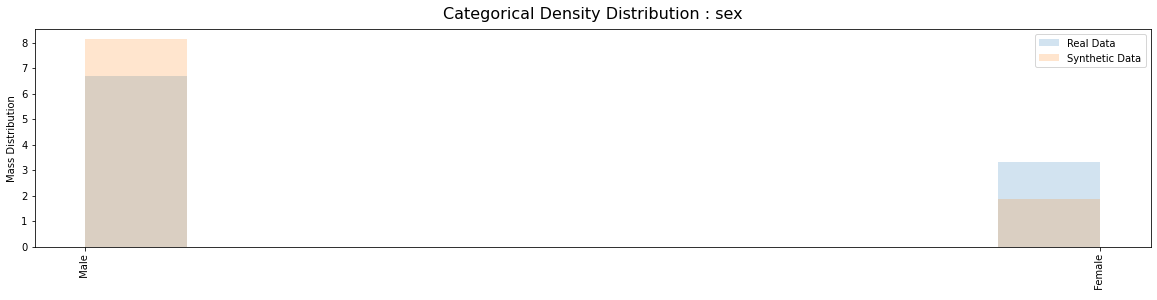

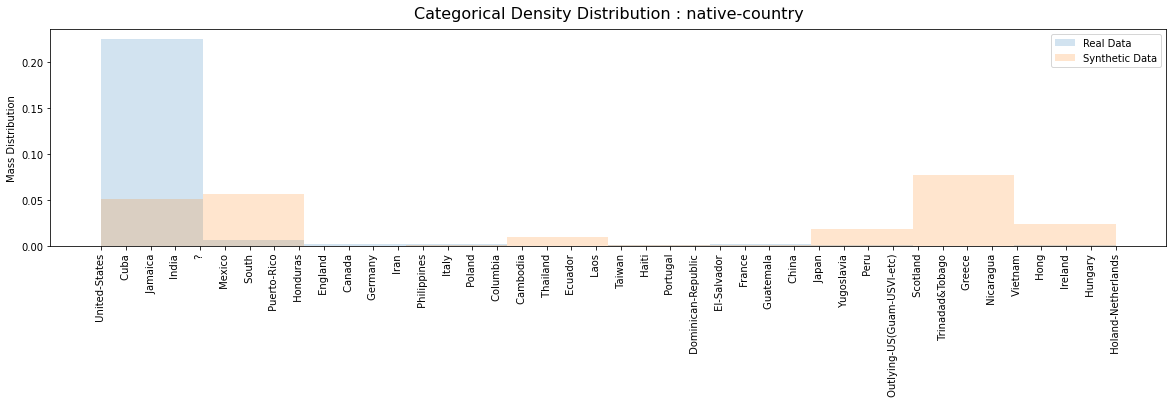

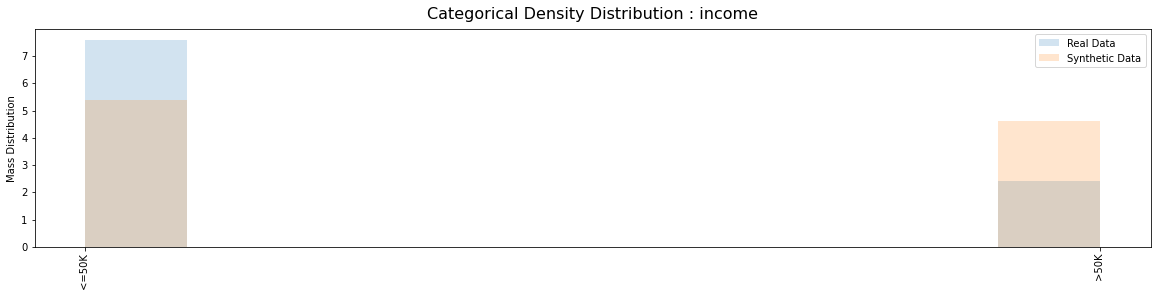

In [34]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [35]:
synth.save('F:/Users/Kaggle/wids/PrivateModelNormalAPI.pth')

#### 

## Adversarial API: Privately differentiable synthesizer

In [38]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cpu')   ### cpu else cuda

In [39]:
synth.fit_adversarial(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Generating train and test splits ...
TRAIN SAMPLES: n=26048
TEST SAMPLES: n=6513
Iteration: [1]  [  0/129]  eta: 0:01:09  loss_t_fake: 0.5647 (0.7123)  loss_t_real: 0.6909 (0.6910)  time: 0.5344  data: 0.0000
Iteration: [1]  [ 50/129]  eta: 0:00:48  loss_t_fake: 0.0090 (0.1021)  loss_t_real: 0.0521 (0.2890)  time: 0.6036  data: 0.0000
Iteration: [1]  [100/129]  eta: 0:00:17  loss_t_fake: 0.0018 (0.0536)  loss_t_real: 0.0106 (0.1581)  time: 0.5822  data: 0.0000
Iteration: [1]  [129/129]  eta: 0:00:00  loss_t_fake: 0.0010 (0.0420)  loss_t_real: 0.0051 (0.1245)  time: 0.5835  data: 0.0000
Iteration: [1] Total time: 0:01:17
Iteration: [1]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0010 (0.0420)  loss_t_real: 0.0051 (0.1245)  loss_s: 0.6956 (0.6981)  time: 0.1153  data: 0.0000
Iteration: [1]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0010 (0.0420)  loss_t_real: 0.0051 (0.1245)  loss_s: 0.7015 (0.7038)  time: 0.1251  data: 0.0000
Iteration: [1]  [2/4]  eta: 0:00:00  loss_t_fake: 0.0010 (0.0420)  loss_t_

In [40]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

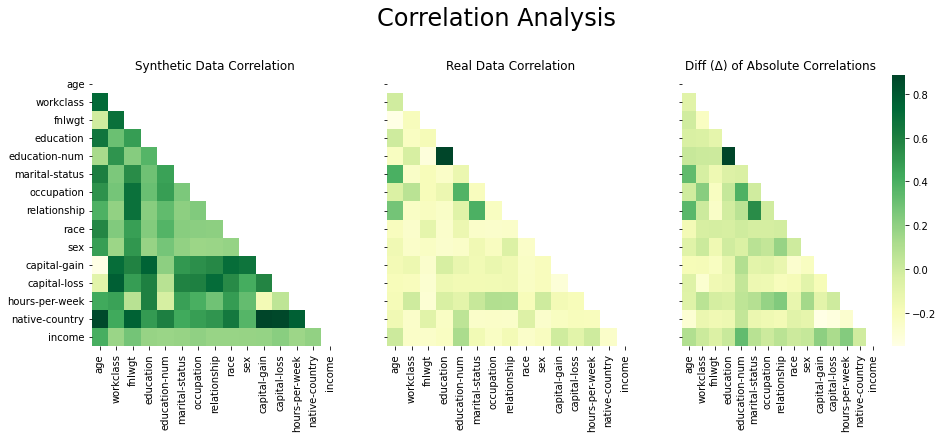

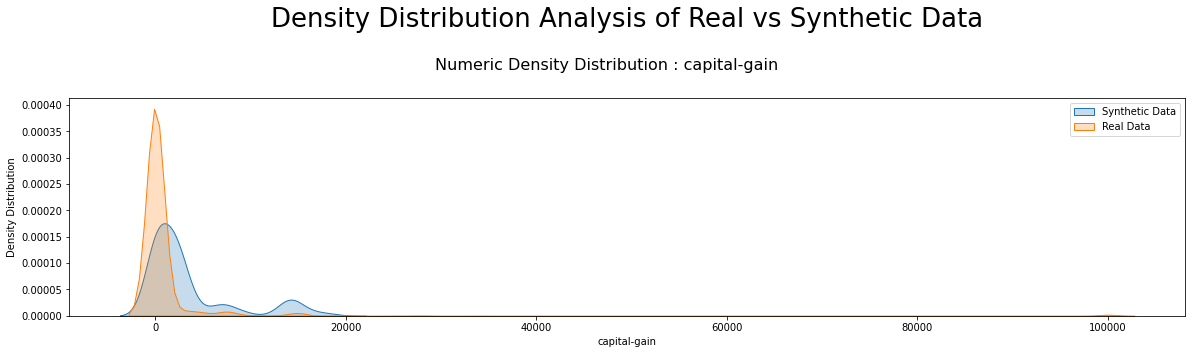

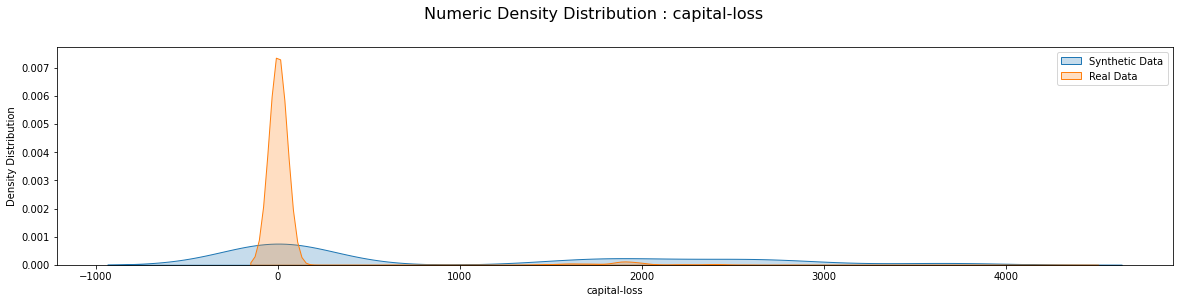

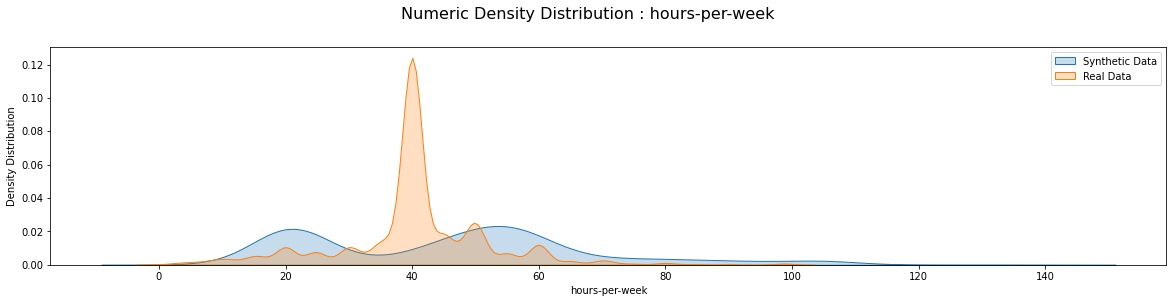

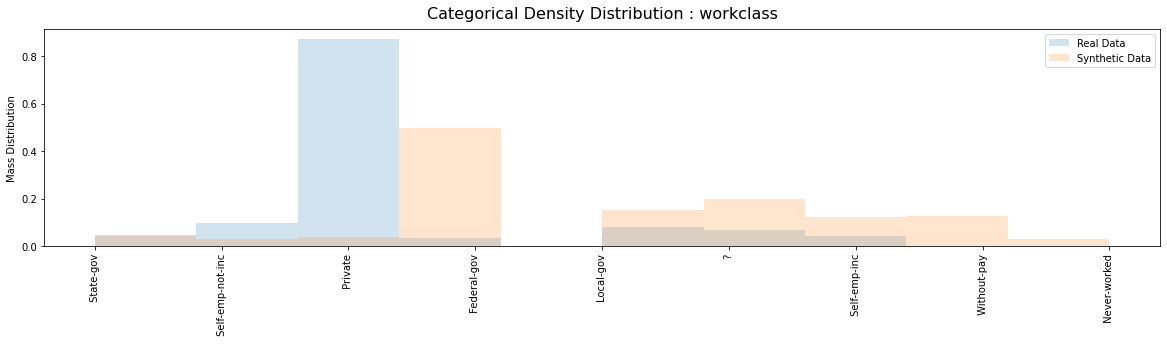

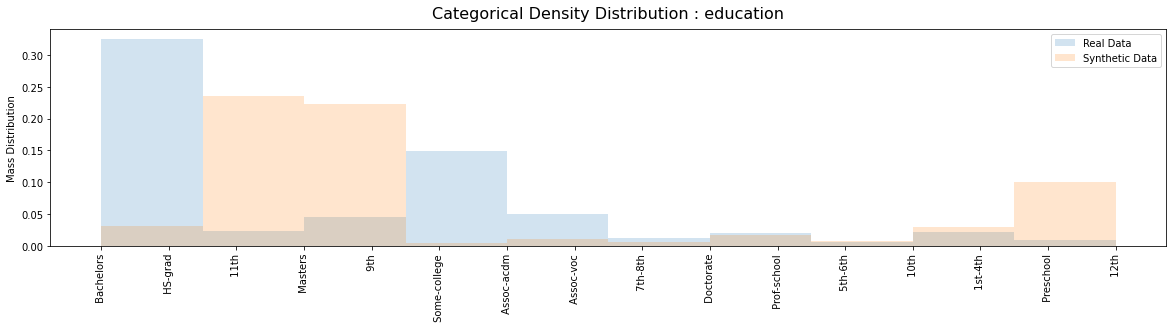

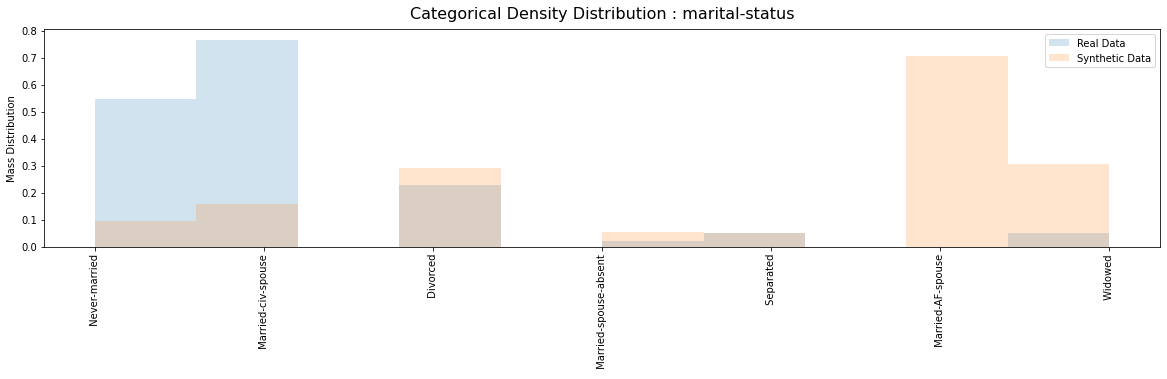

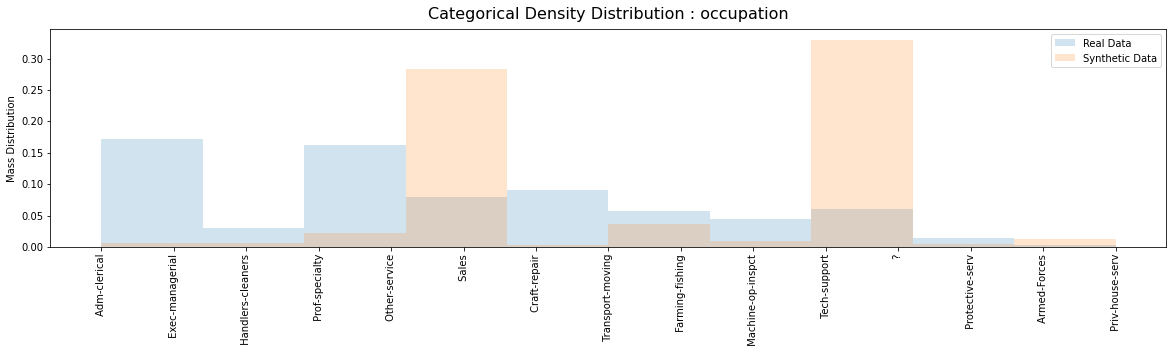

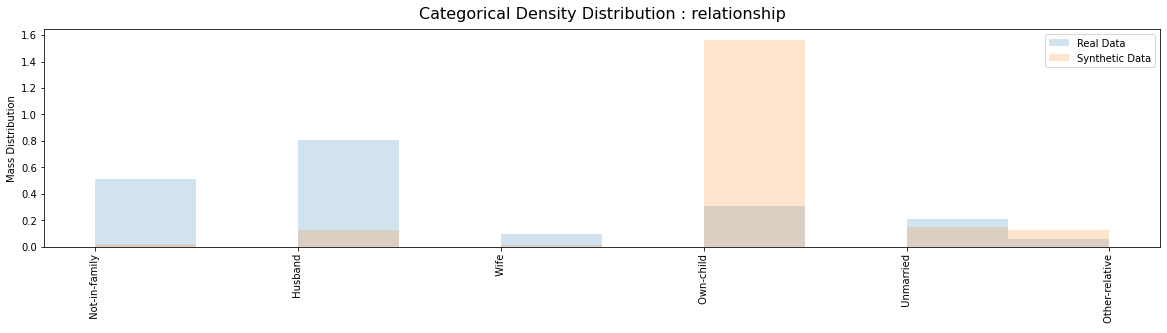

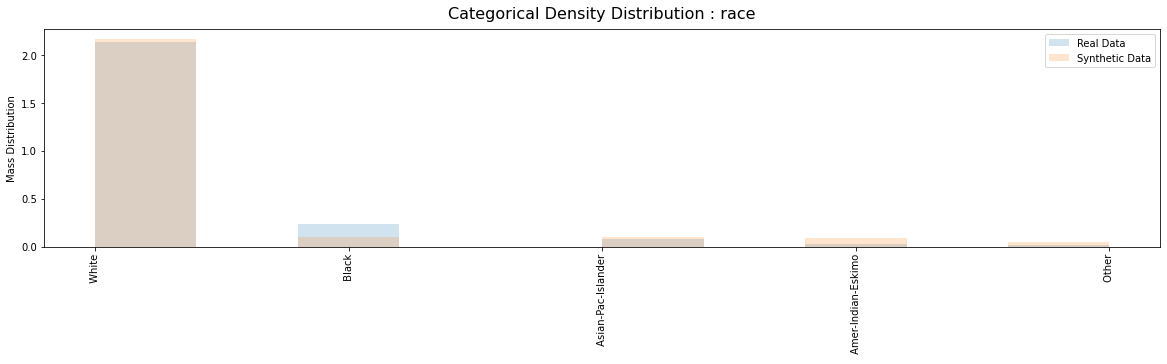

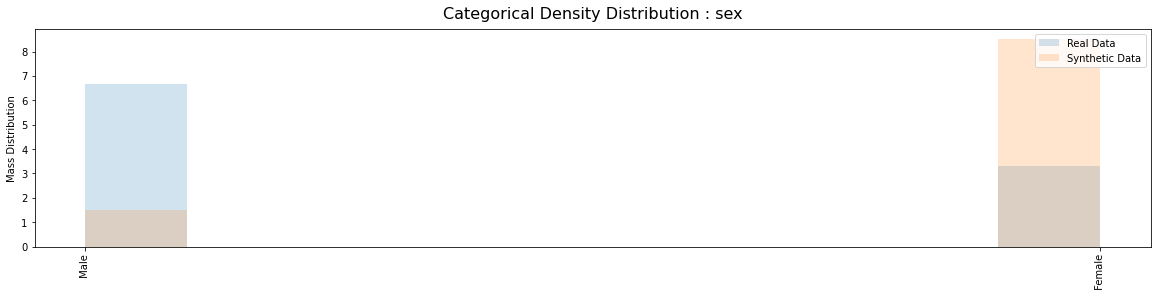

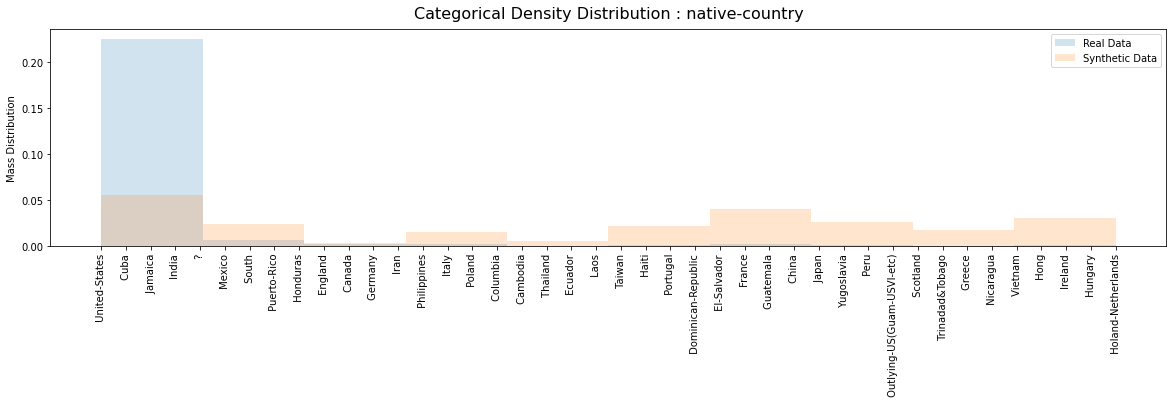

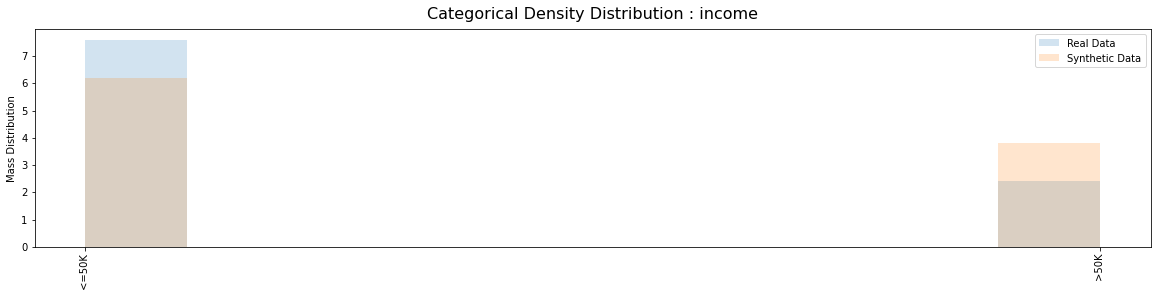

In [42]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

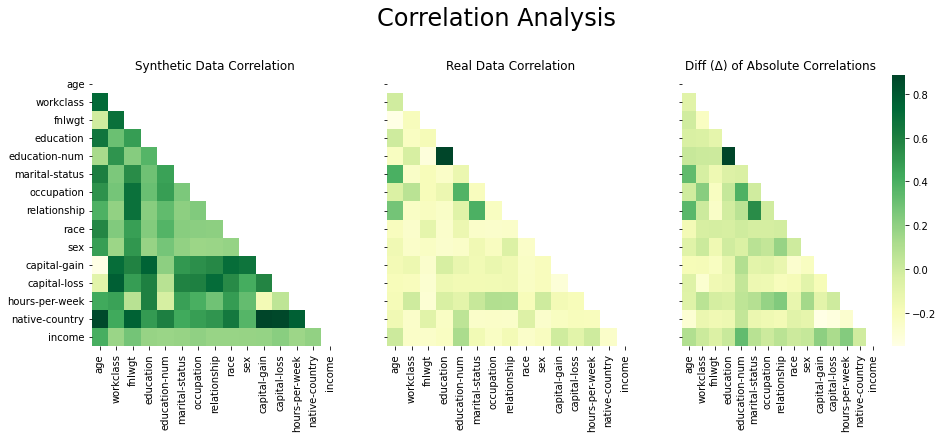

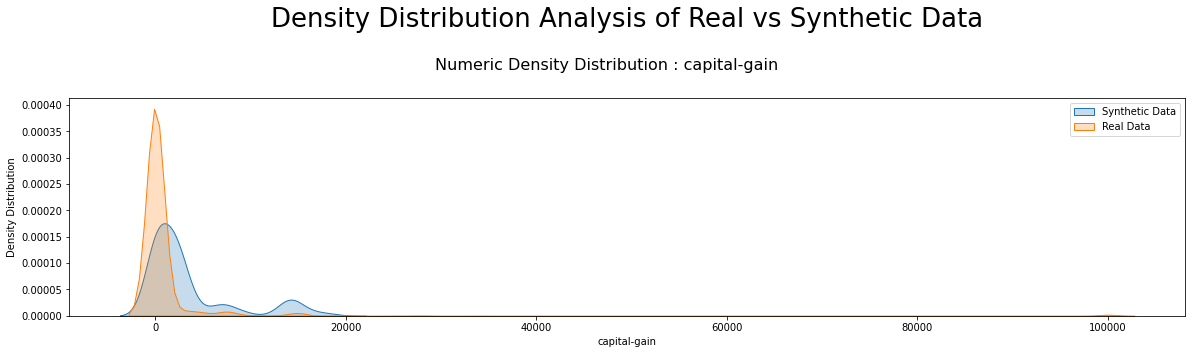

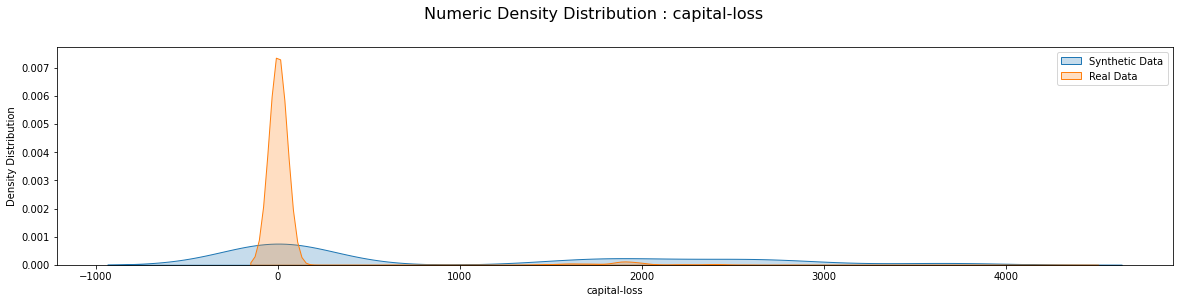

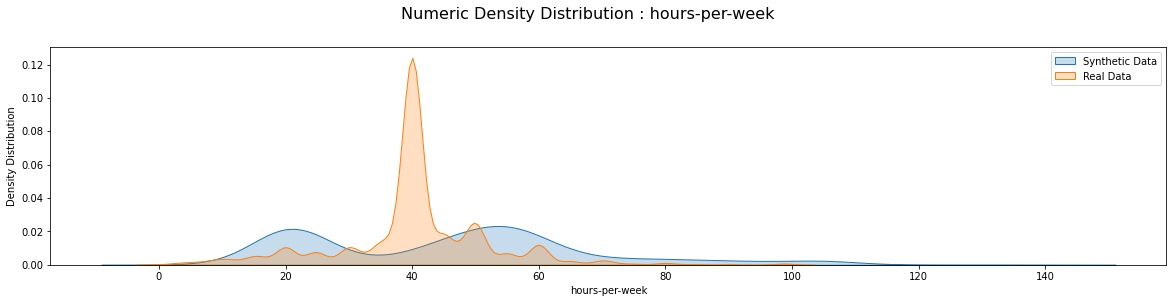

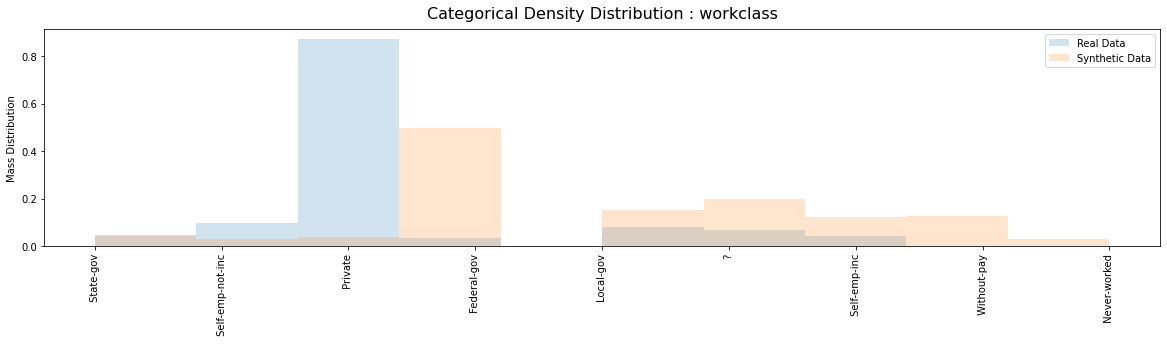

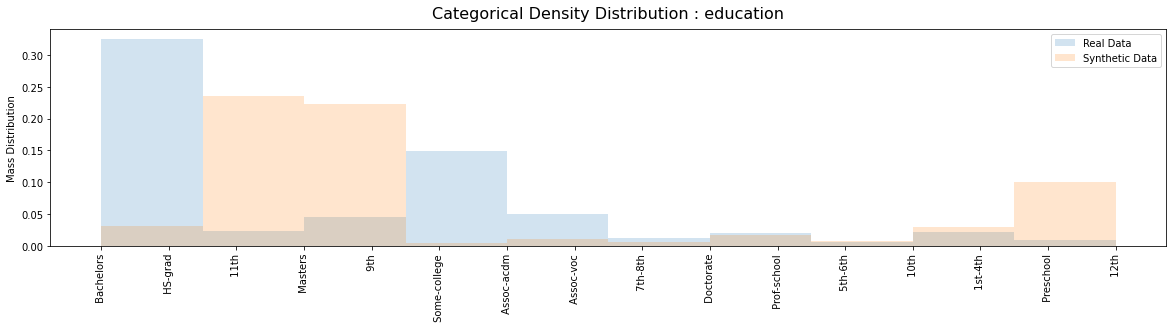

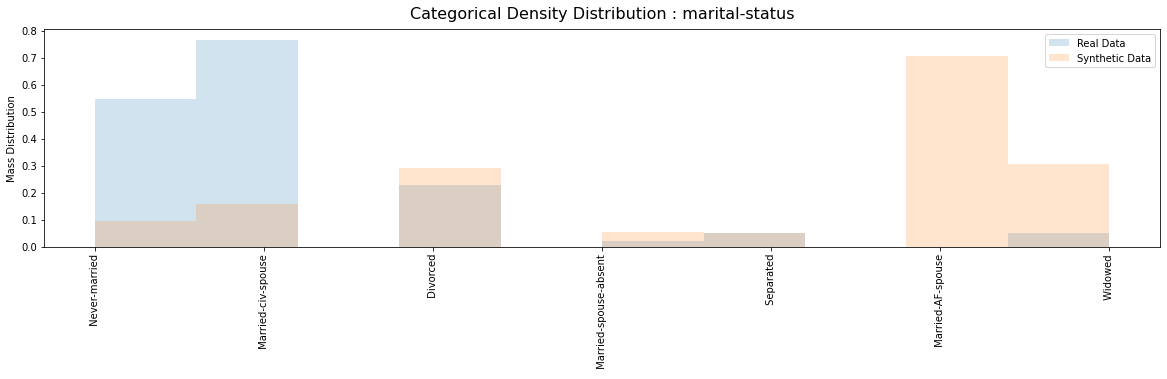

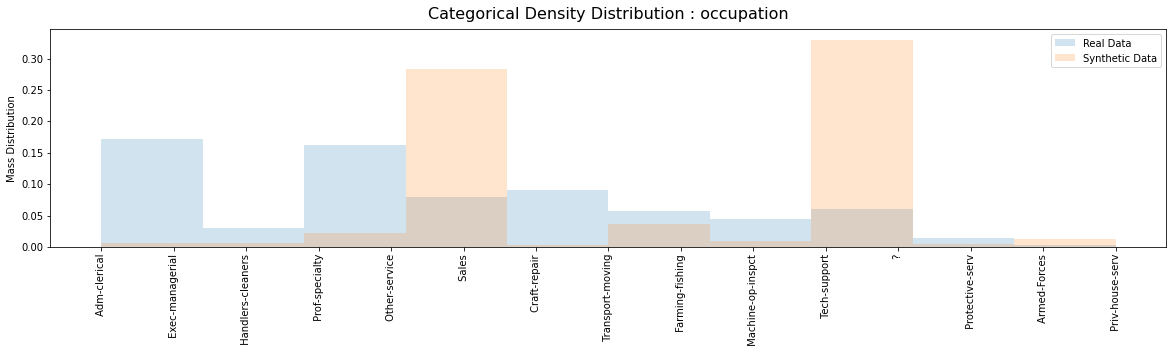

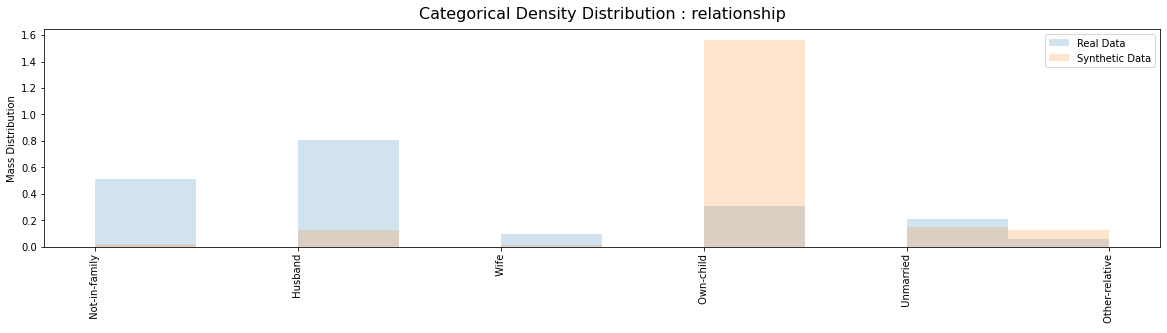

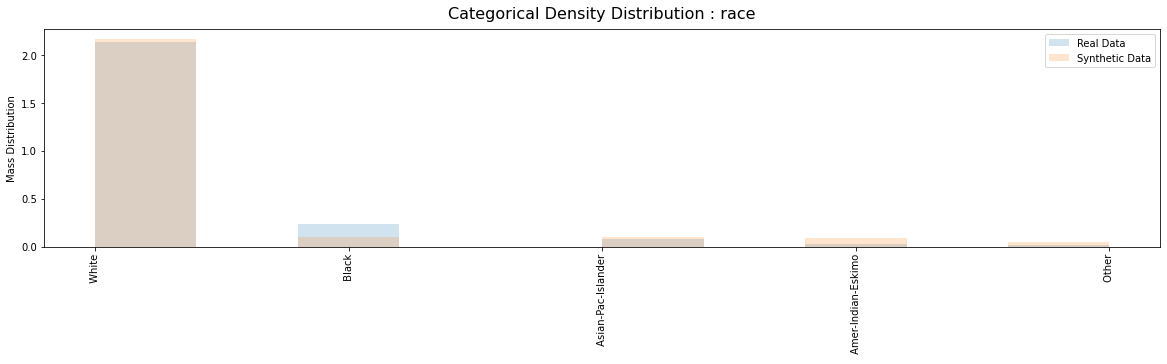

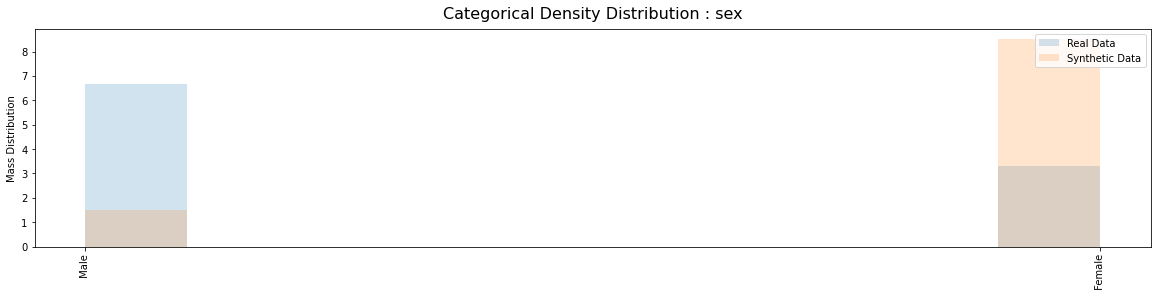

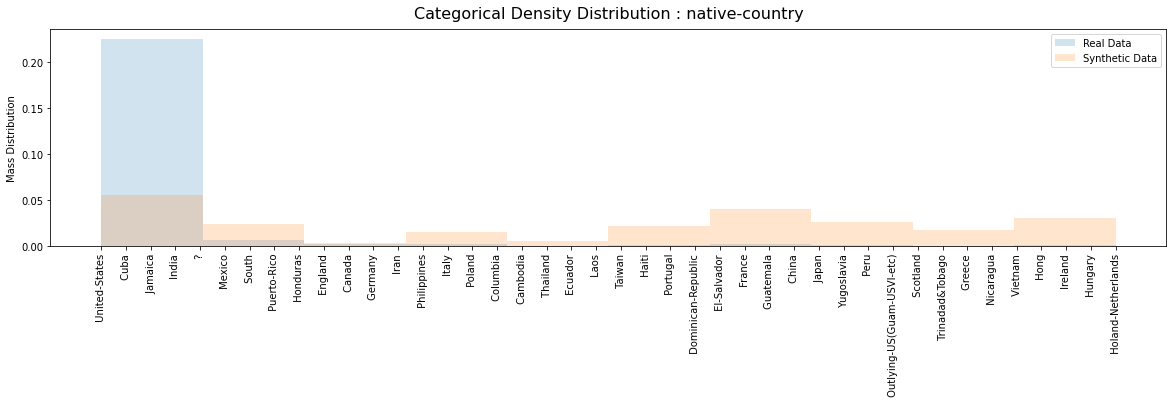

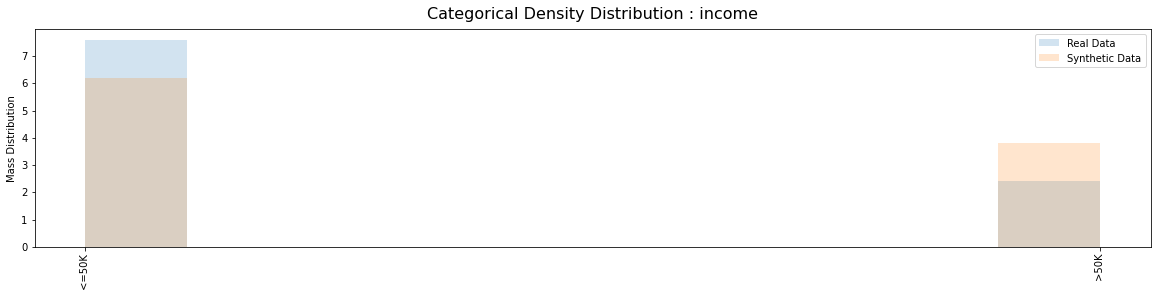

In [43]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

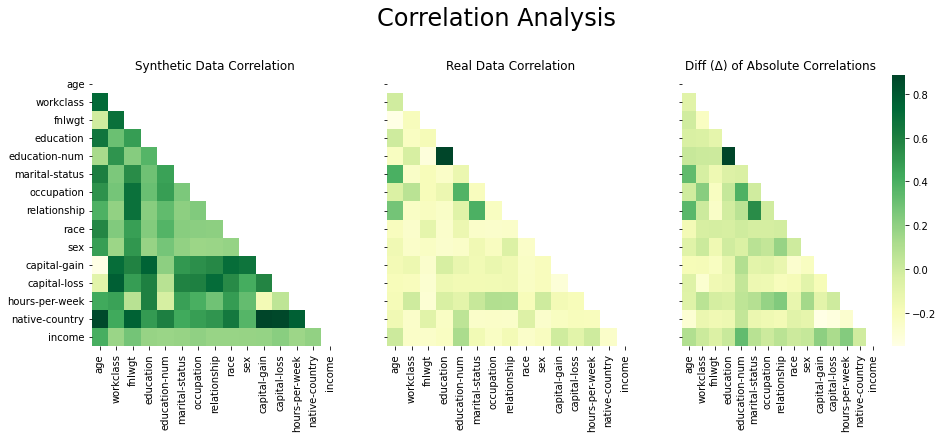

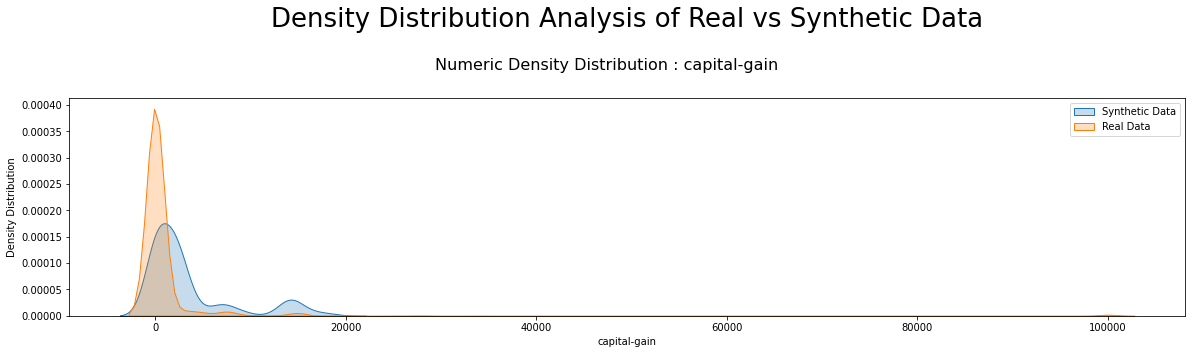

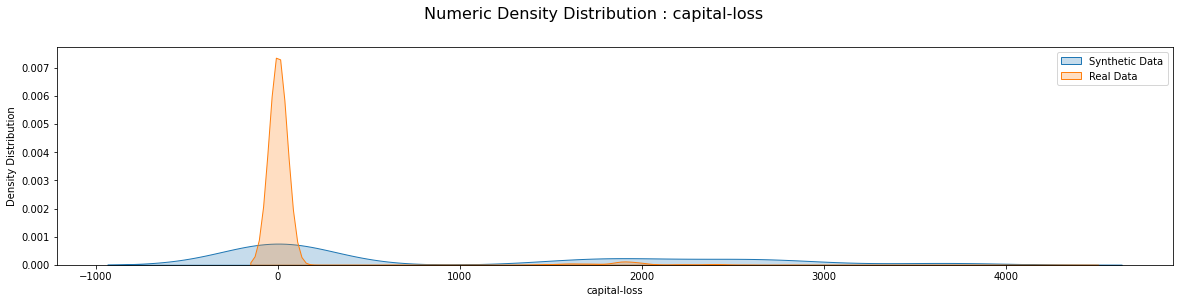

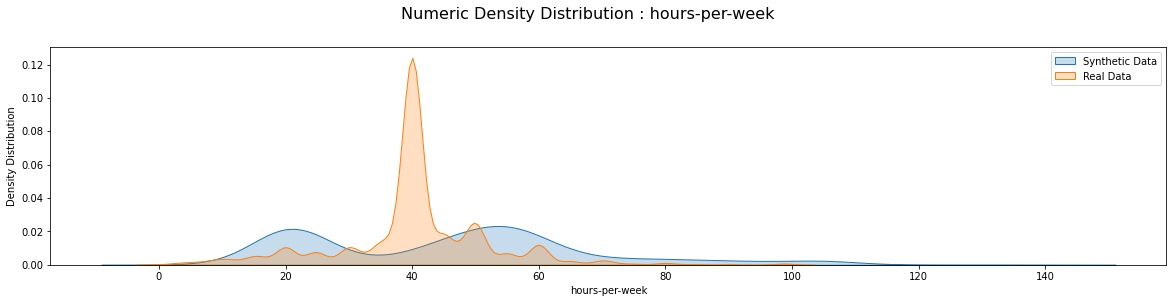

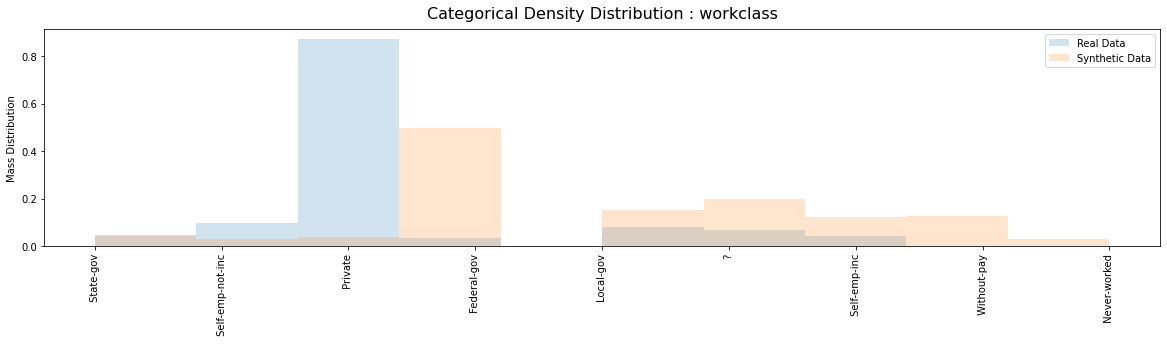

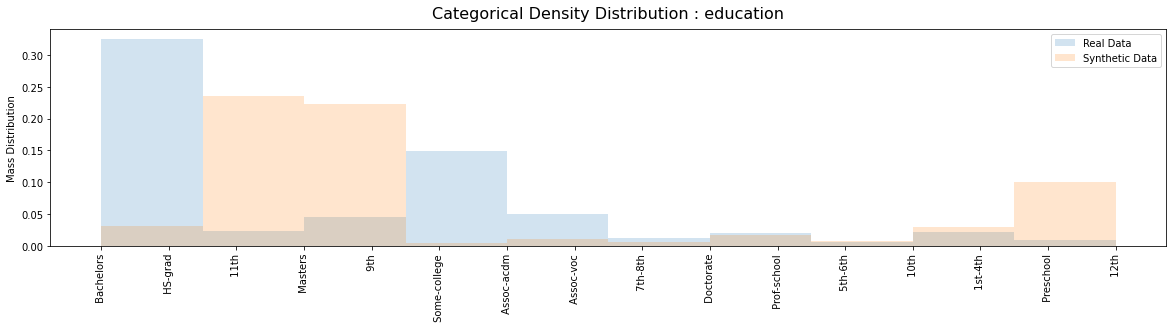

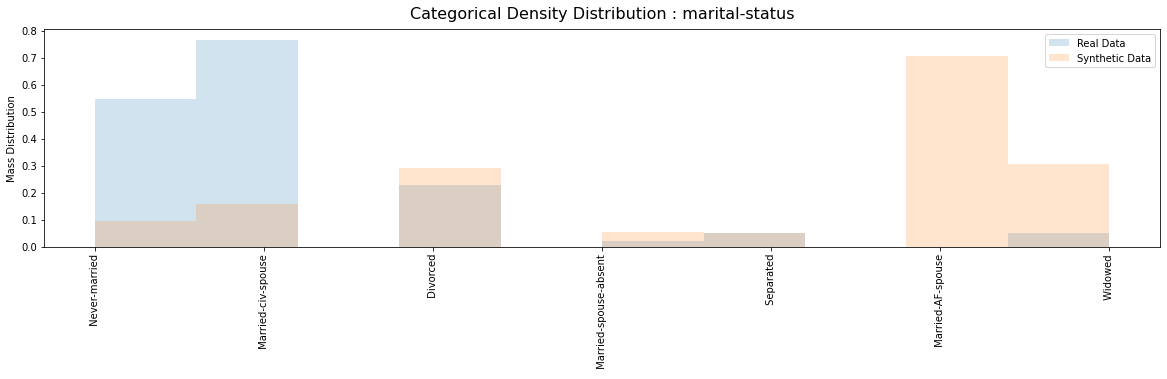

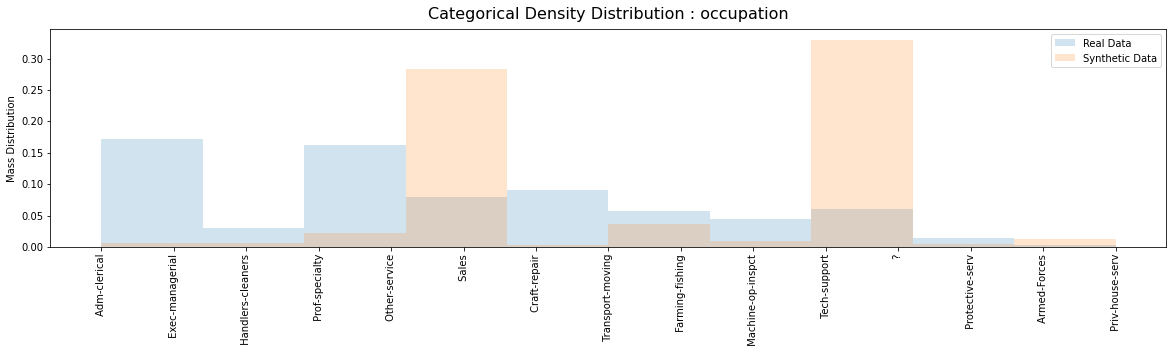

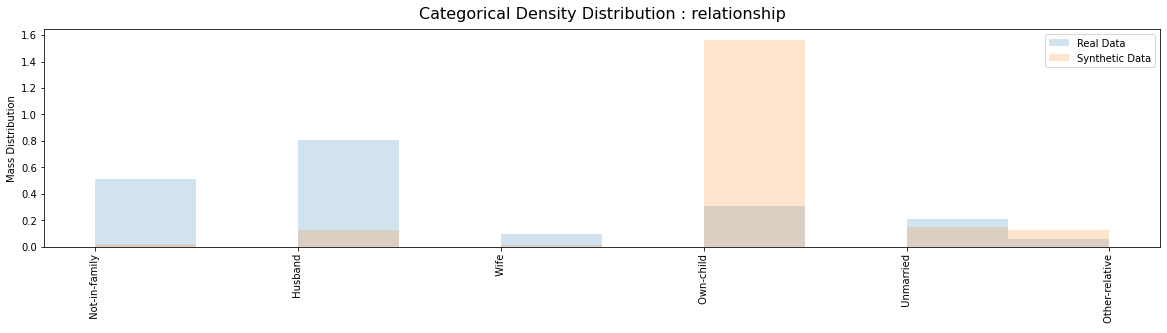

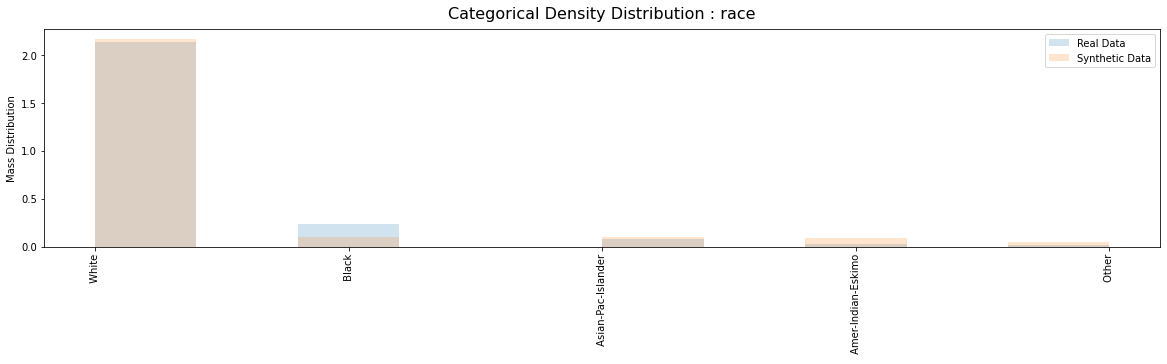

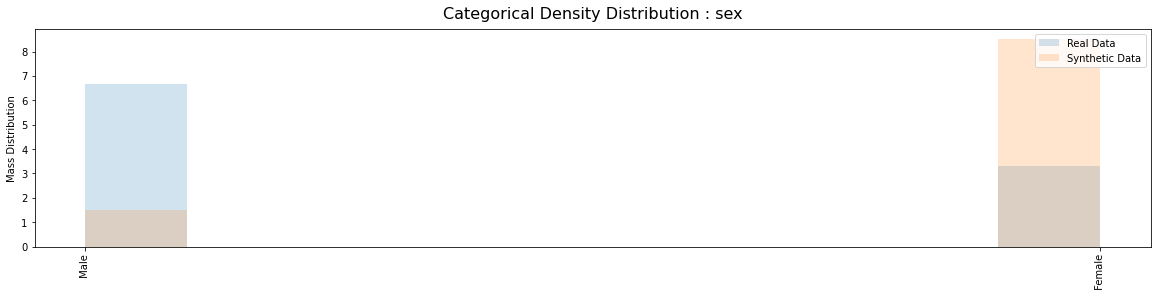

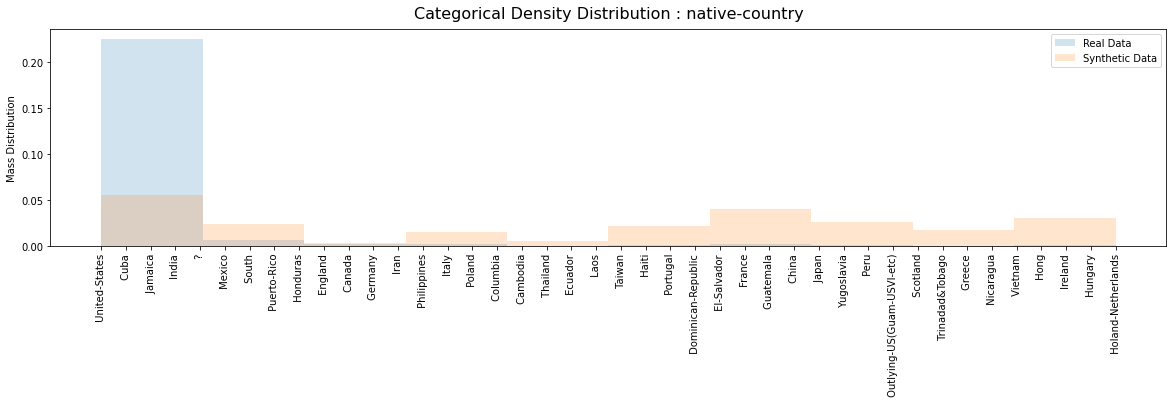

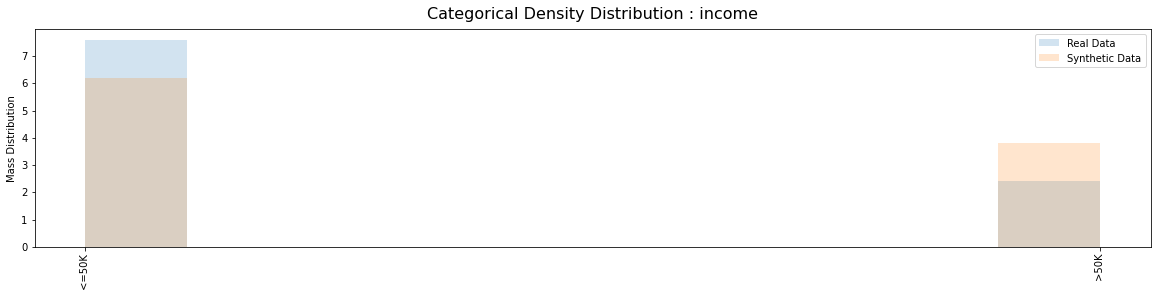

In [44]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [45]:
synth.save('F:/Users/Kaggle/wids/PrivateModelAdvAPI.pth')

#### 

### Fin ###